In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os

# import kaleido

In [ ]:
# !pip install kaleido >> None

# task 1, 2

In [ ]:
predicts_path = '/content/drive/MyDrive/solovey/09.09.23/predicts_new'
paths = [i for i in os.listdir(predicts_path) if '_' not in i]
len(paths)

48

In [ ]:
def make_chart(df, column_name, save_path):
    unique_values = df[column_name].value_counts().reset_index()
    unique_values.columns = [column_name, 'count']
    fig = px.bar(unique_values, x=column_name, y='count', title=f'Distribution of {column_name}', text='count')
    fig.write_image(save_path, engine='kaleido')
    # fig.show()

In [ ]:
 np.digitize(np.array([10, 121, 13]), np.array([100]))

array([0, 1, 0])

In [ ]:
df = pd.read_csv(f'{predicts_path}/283.csv')
sns.histplot(data=df, x='new_salary', bins=20, kde=True, label=f'salary_actual')
ax = plt.gca()  # Получаем текущий объект Axes
bin_edges = ax.patches[0].get_x()
bin_edges = [bin_edge.get_x() for bin_edge in ax.patches]+[ax.patches[-1].get_x() + ax.patches[-1].get_width()]
print(min(df), max())
bin_edges = [min(df['new_salary'])+10000*n for n in range(int((max(df['new_salary'])-min(df['new_salary']))/10000))]
bin_edges

1)  [12000.0, 15150.0, 18300.0, 21450.0, 24600.0, 27750.0, 30900.0, 34050.0, 37200.0, 40350.0, 43500.0, 46650.0, 49800.0, 52950.0, 56100.0, 59250.0, 62400.0, 65550.0, 68700.0, 71850.0, 75000.0]
2)  [14079.328430031735, 16367.91583147458, 18656.50323291742, 20945.090634360262, 23233.678035803103, 25522.265437245947, 27810.852838688792, 30099.440240131633, 32388.027641574474, 34676.615043017315, 36965.202444460156, 39253.789845903, 41542.37724734584, 43830.964648788686, 46119.552050231534, 48408.139451674375, 50696.726853117216, 52985.31425456006, 55273.9016560029, 57562.48905744574, 59851.07645888858]
1.3763948879619274


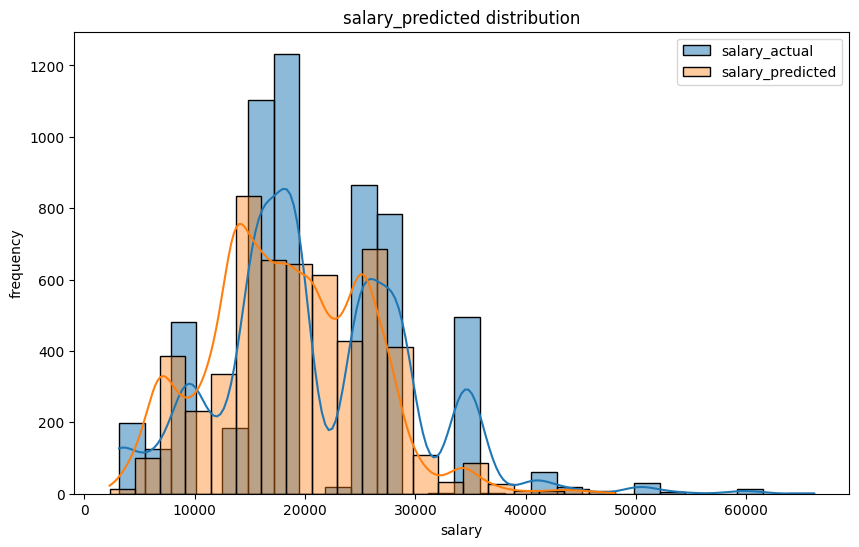

In [ ]:
def round_to_nearest(number):
    rounded = round(number / 10000) * 10000
    return rounded


def charts_bins(df, column, save_path):
    df = df[df['new_salary']<1000000]
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='new_salary', bins=20, kde=True, label=f'salary_actual')
    ax = plt.gca()  # Получаем текущий объект Axes
    bin_edges = ax.patches[0].get_x()
    bin_edges = [bin_edge.get_x() for bin_edge in ax.patches]+[ax.patches[-1].get_x() + ax.patches[-1].get_width()]

    if bin_edges[1] - bin_edges[0] > 10000:
        bin_edges = [min(df['new_salary'])+10000*n for n in range(int((max(df['new_salary'])-min(df['new_salary']))/10000))]
        df['salary_new2'] = bin_indices * 10000

    else:
        bin_indices = np.digitize(df['new_salary'], bin_edges)
        df['salary_new2'] = bin_indices * ax.patches[0].get_width()

    print('1) ', bin_edges)
    plt.close()

    if column == 'new_salary':
        label = 'salary_actual'
        name = 'salary_actual'
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x='salary_new2', bins=20, kde=True, label=f'salary_actual')


    elif column == 'predict_before':
        label = 'salary'
        name = 'salary_predicted'
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=column, bins=20, kde=True, label=f'predict_before')
        ax = plt.gca()  # Получаем текущий объект Axes
        bin_edges = ax.patches[0].get_x()
        bin_edges = [bin_edge.get_x() for bin_edge in ax.patches]+[ax.patches[-1].get_x() + ax.patches[-1].get_width()]
        print('2) ', bin_edges)

        bin_indices = np.digitize(df[column], bin_edges)
        df['predict_before2'] = bin_indices * ax.patches[0].get_width()
        plt.close()
        plt.figure(figsize=(10, 6))

        # koef_pred = df['predict_before2'].quantile(0.75) - df['predict_before2'].quantile(0.25)
        # koef_act = df['new_salary2'].quantile(0.75) - df['new_salary2'].quantile(0.25)
        koef_pred = max(df['predict_before2'])-min(df['predict_before2'])
        koef_act = max(df['salary_new2'])-min(df['salary_new2'])

        k = koef_act/koef_pred
        print(k)


        sns.histplot(data=df, x='salary_new2', bins=int(20*k), kde=True, label=f'salary_actual')
        sns.histplot(data=df, x='predict_before2', bins=20, kde=True, label=f'salary_predicted', alpha=0.4)


    plt.legend()
    plt.xlabel(label)
    plt.ylabel('frequency')
    plt.title(f'{name} distribution')
    plt.savefig(save_path)
    plt.show()


df = pd.read_csv(f'{predicts_path}/87.csv')
charts_bins(df, column='predict_before', save_path='')

In [ ]:
# создаем папки
folder_names = [i[:-4] for i in paths]
base_dir =  '/content/drive/MyDrive/solovey/09.09.23/chart_task2'
for folder_name in folder_names:
    folder_path = os.path.join(base_dir, str(folder_name))
    os.makedirs(folder_path, exist_ok=True)

87.csv
я тут
(5624, 11)
1)  [12000.0, 15150.0, 18300.0, 21450.0, 24600.0, 27750.0, 30900.0, 34050.0, 37200.0, 40350.0, 43500.0, 46650.0, 49800.0, 52950.0, 56100.0, 59250.0, 62400.0, 65550.0, 68700.0, 71850.0, 75000.0]
2)  [14079.328430031735, 16367.91583147458, 18656.50323291742, 20945.090634360262, 23233.678035803103, 25522.265437245947, 27810.852838688792, 30099.440240131633, 32388.027641574474, 34676.615043017315, 36965.202444460156, 39253.789845903, 41542.37724734584, 43830.964648788686, 46119.552050231534, 48408.139451674375, 50696.726853117216, 52985.31425456006, 55273.9016560029, 57562.48905744574, 59851.07645888858]
1.3763948879619274


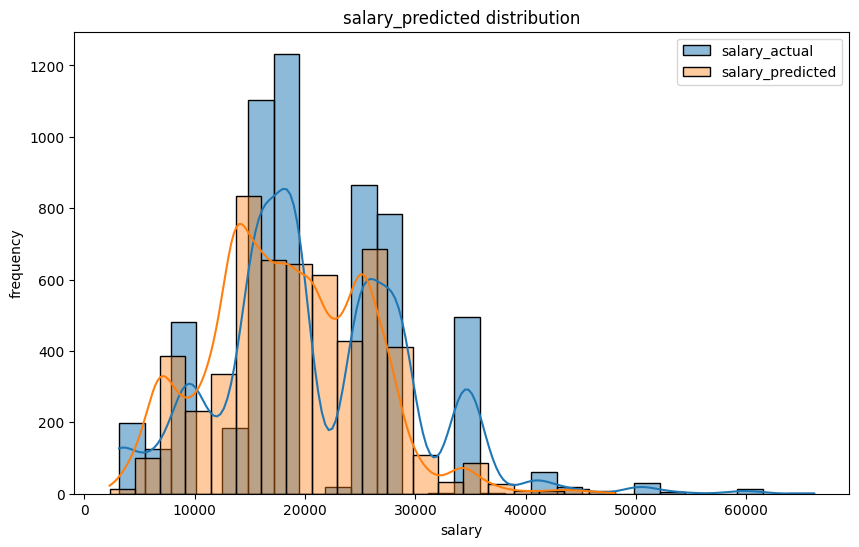

84.csv
я тут
(4979, 11)
1)  [12792.0, 19102.4, 25412.800000000003, 31723.199999999993, 38033.600000000006, 44344.0, 50654.399999999994, 56964.8, 63275.19999999999, 69585.6, 75896.0, 82206.4, 88516.79999999999, 94827.2, 101137.59999999998, 107448.0, 113758.4, 120068.79999999999, 126379.20000000001, 132689.59999999998, 139000.0]
2)  [14403.350399337802, 20589.515079585588, 26775.679759833365, 32961.84444008116, 39148.009120328934, 45334.17380057671, 51520.338480824495, 57706.50316107228, 63892.667841320064, 70078.83252156785, 76264.99720181563, 82451.1618820634, 88637.32656231118, 94823.49124255896, 101009.65592280673, 107195.82060305454, 113381.98528330232, 119568.1499635501, 125754.31464379787, 131940.47932404565, 138126.64400429343]
1.020082769563006


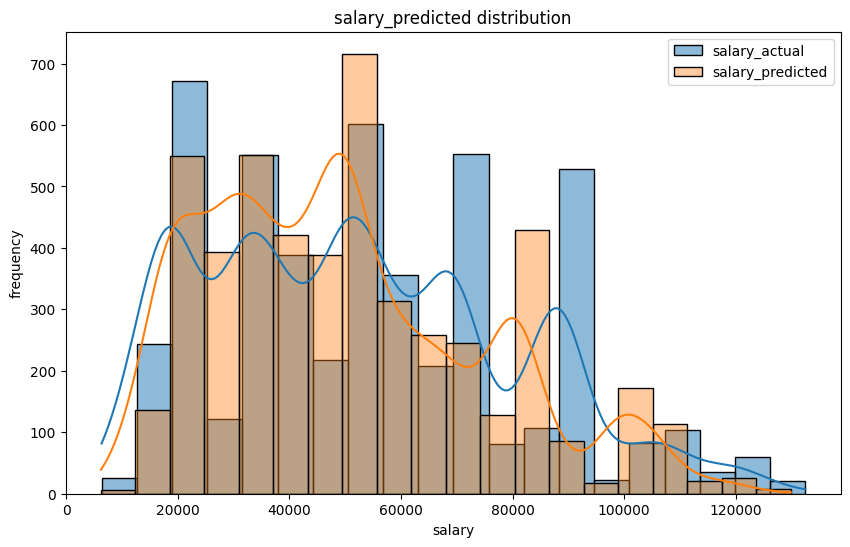

811.csv
я тут
(2059, 11)
1)  [18029.0, 22877.549999999996, 27726.1, 32574.650000000005, 37423.2, 42271.75, 47120.3, 51968.85, 56817.4, 61665.95000000001, 66514.5, 71363.05000000002, 76211.6, 81060.15, 85908.70000000001, 90757.25, 95605.80000000002, 100454.35, 105302.90000000001, 110151.45000000001, 115000.00000000001]
2)  [23082.554145361395, 26843.694945664607, 30604.835745967823, 34365.976546271035, 38127.11734657425, 41888.25814687746, 45649.39894718067, 49410.53974748388, 53171.680547787095, 56932.82134809031, 60693.96214839352, 64455.10294869672, 68216.24374899996, 71977.38454930315, 75738.52534960638, 79499.66614990958, 83260.8069502128, 87021.947750516, 90783.08855081923, 94544.22935112243, 98305.37015142564]
1.2246610123260122


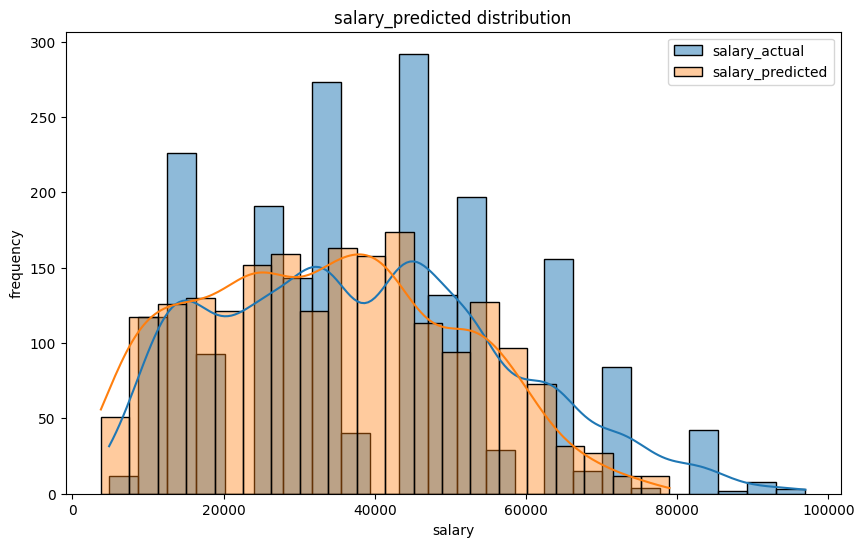

812.csv
я тут
(1259, 11)
1)  [12130.0, 18023.5, 23917.0, 29810.5, 35704.0, 41597.5, 47491.0, 53384.5, 59278.0, 65171.5, 71065.0, 76958.5, 82852.0, 88745.5, 94639.0, 100532.5, 106426.0, 112319.5, 118213.0, 124106.5, 130000.0]
2)  [15055.196362252254, 18476.42000549716, 21897.643648742072, 25318.867291986986, 28740.090935231892, 32161.314578476806, 35582.53822172171, 39003.761864966626, 42424.98550821154, 45846.20915145645, 49267.43279470136, 52688.65643794627, 56109.88008119118, 59531.10372443609, 62952.327367681006, 66373.5510109259, 69794.77465417082, 73215.99829741573, 76637.22194066065, 80058.44558390556, 83479.66922715047]
1.6405993083613626


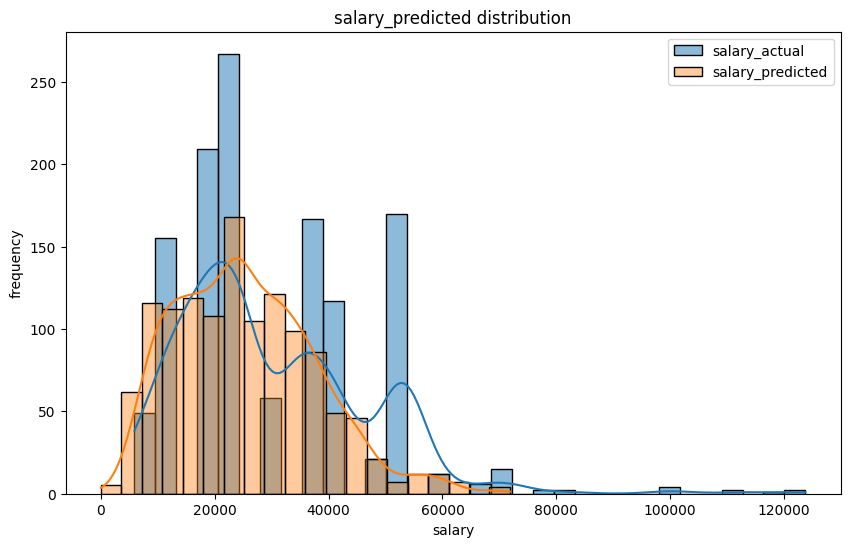

124.csv
я тут
(231, 11)
1)  [12000.0, 14900.0, 17800.0, 20700.0, 23600.0, 26500.0, 29400.0, 32300.0, 35200.0, 38100.0, 41000.0, 43900.0, 46800.0, 49700.0, 52600.0, 55500.0, 58400.0, 61300.0, 64200.0, 67100.0, 70000.0]
2)  [12697.936589378165, 13807.75328806111, 14917.569986744056, 16027.386685427005, 17137.203384109955, 18247.0200827929, 19356.836781475846, 20466.65348015879, 21576.470178841737, 22686.28687752469, 23796.103576207635, 24905.92027489058, 26015.736973573526, 27125.553672256472, 28235.370370939418, 29345.18706962237, 30455.003768305316, 31564.82046698826, 32674.637165671207, 33784.453864354145, 34894.2705630371]
2.4886134486734584


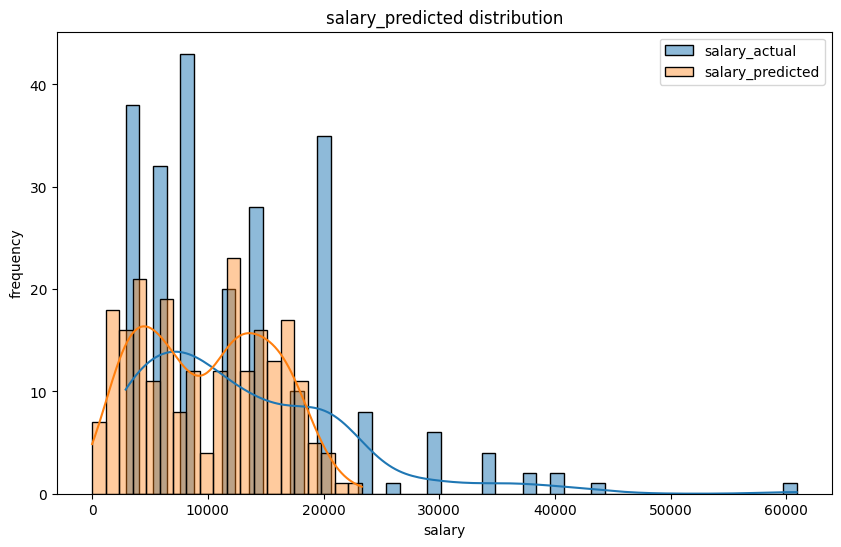

693.csv
я тут
(154, 11)
1)  [12130.0, 15523.5, 18917.0, 22310.5, 25704.0, 29097.5, 32491.0, 35884.5, 39278.0, 42671.5, 46065.0, 49458.5, 52852.0, 56245.5, 59639.0, 63032.5, 66426.0, 69819.5, 73213.0, 76606.5, 80000.0]
2)  [14879.172260435156, 17669.276224918554, 20459.380189401963, 23249.484153885365, 26039.588118368767, 28829.692082852172, 31619.79604733557, 34409.90001181899, 37200.00397630238, 39990.10794078579, 42780.211905269185, 45570.315869752594, 48360.41983423599, 51150.5237987194, 53940.62776320281, 56730.7317276862, 59520.83569216961, 62310.939656653005, 65101.04362113641, 67891.14758561982, 70681.25155010322]
1.2162629218113452


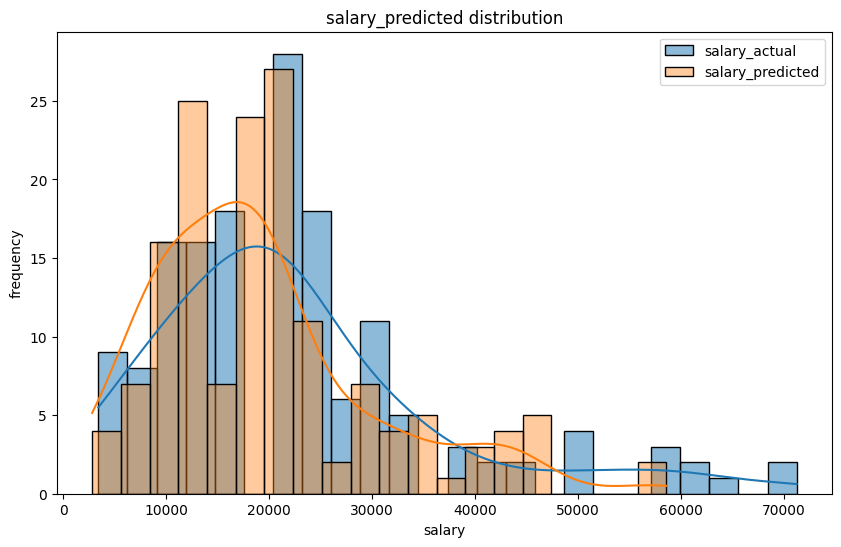

873.csv
я тут
(107, 11)
1)  [13000.0, 17350.0, 21700.0, 26050.0, 30400.0, 34750.0, 39100.0, 43450.0, 47800.0, 52150.0, 56500.0, 60850.0, 65200.0, 69550.0, 73900.0, 78250.0, 82600.0, 86950.0, 91300.0, 95650.0, 100000.0]
2)  [27100.509677435755, 29780.530127146783, 32460.550576857808, 35140.57102656883, 37820.59147627986, 40500.61192599088, 43180.6323757019, 45860.65282541294, 48540.67327512396, 51220.693724834986, 53900.71417454601, 56580.734624257035, 59260.75507396806, 61940.77552367908, 64620.7959733901, 67300.81642310115, 69980.83687281216, 72660.8573225232, 75340.8777722342, 78020.89822194524, 80700.91867165627]
1.7085494138355481


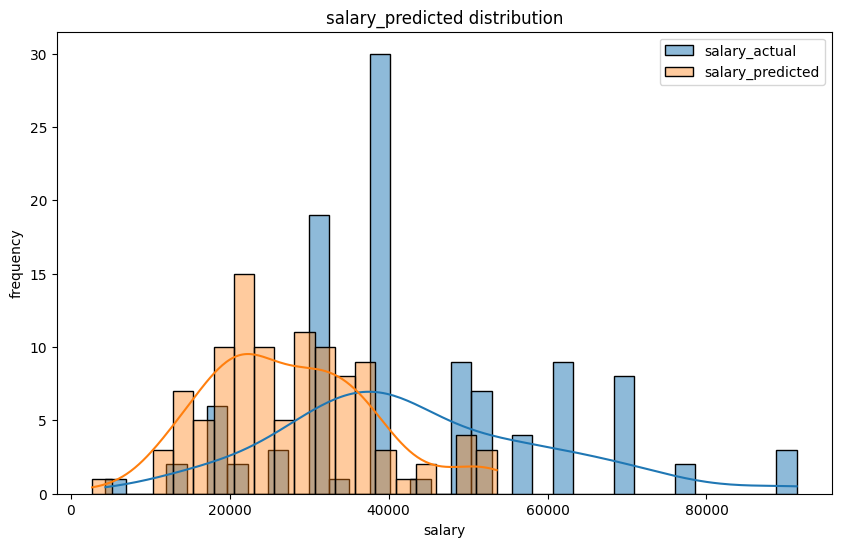

712.csv
я тут
(1786, 11)
1)  [12792.0, 16652.4, 20512.8, 24373.200000000004, 28233.6, 32093.999999999996, 35954.40000000001, 39814.8, 43675.2, 47535.600000000006, 51396.0, 55256.40000000001, 59116.8, 62977.20000000001, 66837.6, 70698.0, 74558.4, 78418.8, 82279.19999999998, 86139.6, 90000.0]
2)  [14698.00916612053, 17557.18135689028, 20416.353547660023, 23275.525738429773, 26134.697929199523, 28993.870119969266, 31853.042310739016, 34712.21450150876, 37571.38669227851, 40430.55888304826, 43289.731073818, 46148.90326458775, 49008.075455357495, 51867.247646127245, 54726.419836896996, 57585.59202766674, 60444.76421843649, 63303.93640920623, 66163.10859997598, 69022.28079074573, 71881.45298151548]
1.350181011294986


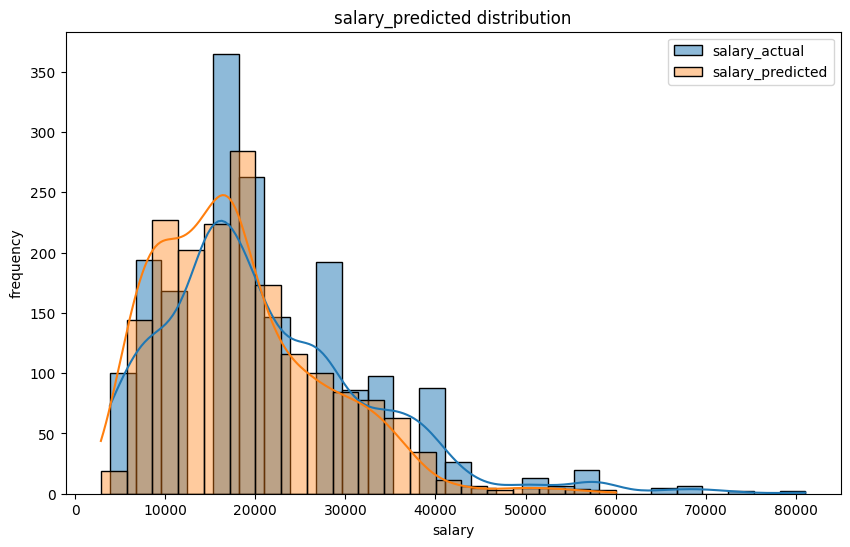

917.csv
я тут
(152, 11)
1)  [12130.0, 14523.5, 16917.0, 19310.5, 21704.0, 24097.5, 26491.0, 28884.5, 31278.0, 33671.5, 36065.0, 38458.5, 40852.0, 43245.5, 45639.0, 48032.5, 50426.0, 52819.5, 55213.0, 57606.5, 60000.0]
2)  [14211.060849082707, 15820.993114066707, 17430.9253790507, 19040.857644034702, 20650.7899090187, 22260.722174002694, 23870.65443898669, 25480.586703970694, 27090.51896895469, 28700.451233938686, 30310.38349892268, 31920.315763906685, 33530.24802889068, 35140.18029387467, 36750.11255885867, 38360.044823842676, 39969.977088826665, 41579.90935381067, 43189.84161879467, 44799.77388377866, 46409.706148762656]
1.4867085106986104


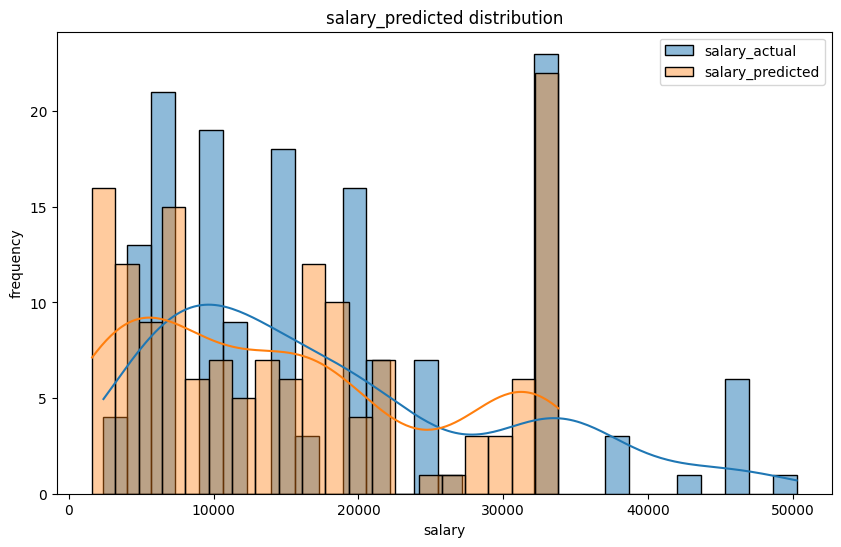

852.csv
я тут
(13, 11)
1)  [12130.0, 14773.5, 17417.0, 20060.5, 22704.0, 25347.5, 27991.0, 30634.5, 33278.0, 35921.5, 38565.0, 41208.5, 43852.0, 46495.5, 49139.0, 51782.5, 54426.0, 57069.5, 59713.0, 62356.5, 65000.0]
2)  [20596.61338313383, 22247.961788338496, 23899.310193543155, 25550.658598747825, 27202.007003952487, 28853.35540915715, 30504.70381436182, 32156.05221956648, 33807.40062477115, 35458.74902997582, 37110.097435180476, 38761.445840385146, 40412.794245589816, 42064.14265079447, 43715.49105599914, 45366.839461203796, 47018.187866408465, 48669.536271613135, 50320.88467681779, 51972.23308202246, 53623.58148722712]
1.600813003281623


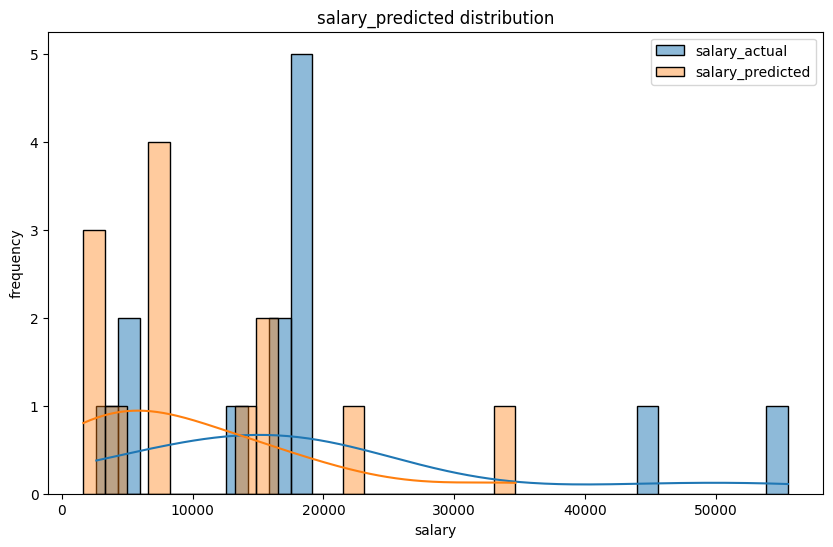

954.csv
я тут
(368, 11)
1)  [18000.0, 24600.0, 31200.0, 37800.0, 44400.0, 51000.0, 57600.0, 64200.0, 70800.0, 77400.0, 84000.0, 90600.0, 97200.0, 103800.0, 110400.0, 117000.0, 123600.0, 130200.0, 136800.0, 143400.0, 150000.0]
2)  [17650.939153408828, 23979.30039846344, 30307.661643518048, 36636.022888572654, 42964.38413362726, 49292.74537868187, 55621.10662373649, 61949.46786879109, 68277.8291138457, 74606.19035890029, 80934.55160395493, 87262.91284900953, 93591.27409406414, 99919.63533911874, 106247.99658417335, 112576.35782922796, 118904.71907428256, 125233.08031933717, 131561.44156439177, 137889.8028094464, 144218.16405450102]
1.0429240279476248


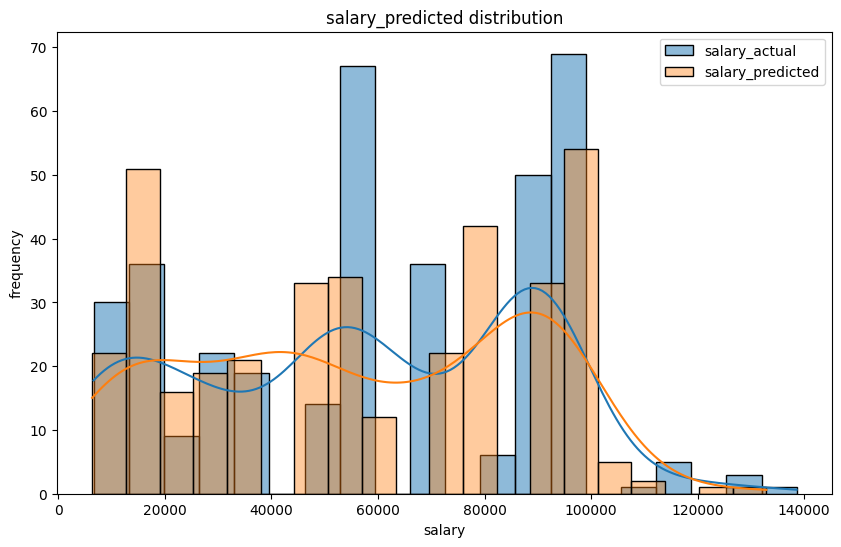

888.csv
я тут
(9606, 11)
1)  [12000.0, 18650.0, 25300.0, 31950.0, 38600.0, 45250.0, 51900.0, 58550.0, 65200.0, 71850.0, 78500.0, 85150.0, 91800.0, 98450.0, 105100.0, 111750.0, 118400.0, 125050.0, 131700.0, 138350.0, 145000.0]
2)  [12613.250928200006, 18357.891993627854, 24102.5330590557, 29847.174124483543, 35591.81518991139, 41336.45625533923, 47081.09732076709, 52825.738386194935, 58570.37945162278, 64315.020517050616, 70059.66158247847, 75804.30264790631, 81548.94371333416, 87293.58477876202, 93038.22584418984, 98782.8669096177, 104527.50797504553, 110272.14904047339, 116016.79010590122, 121761.43117132908, 127506.07223675693]
1.157600609726645


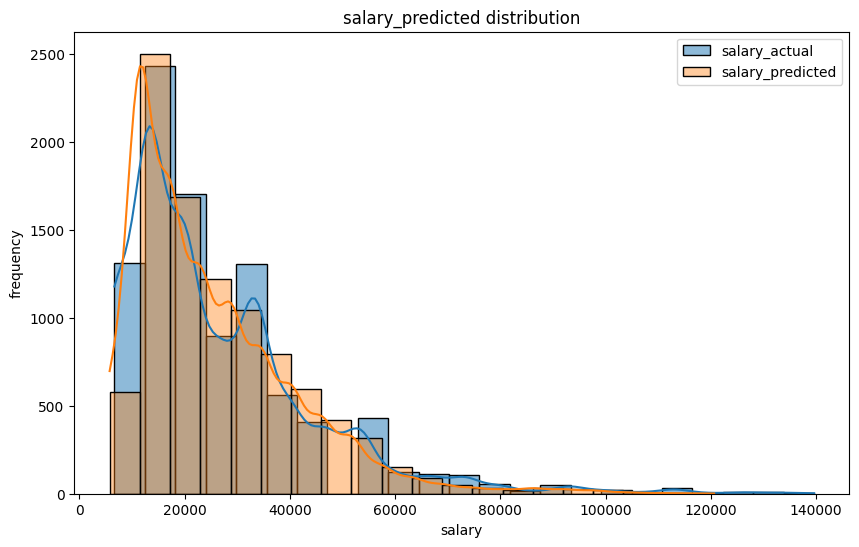

853.csv
я тут
(2205, 11)
1)  [11682.0, 13497.899999999998, 15313.8, 17129.700000000004, 18945.6, 20761.5, 22577.4, 24393.300000000003, 26209.200000000004, 28025.1, 29841.0, 31656.9, 33472.8, 35288.7, 37104.600000000006, 38920.5, 40736.40000000001, 42552.3, 44368.2, 46184.100000000006, 48000.00000000001]
2)  [11823.882823144544, 13330.268801128972, 14836.6547791134, 16343.040757097828, 17849.426735082256, 19355.812713066684, 20862.198691051115, 22368.584669035543, 23874.97064701997, 25381.3566250044, 26887.742602988827, 28394.12858097325, 29900.514558957686, 31406.900536942114, 32913.28651492654, 34419.67249291096, 35926.0584708954, 37432.44444887982, 38938.83042686425, 40445.216404848674, 41951.6023828331]
1.1451945419116432


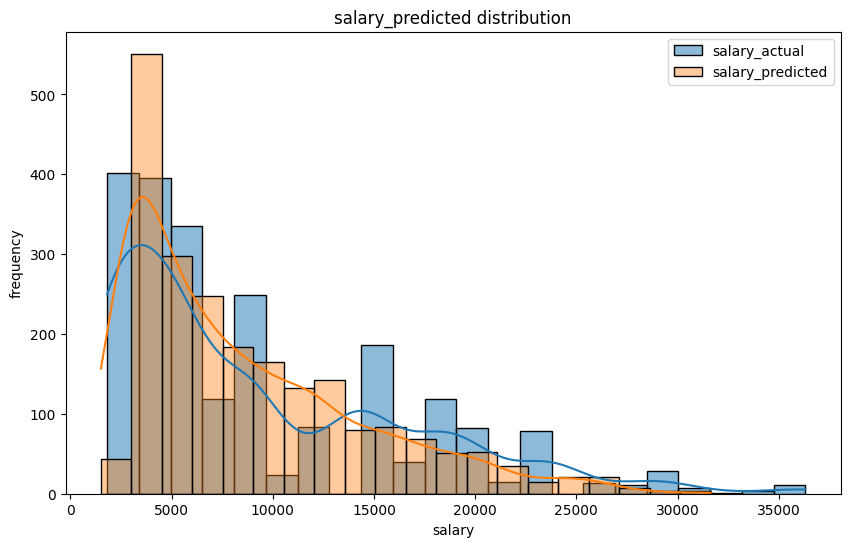

561.csv
я тут
(73, 11)
1)  [13920.0, 16724.0, 19528.0, 22332.0, 25136.0, 27940.0, 30744.0, 33548.0, 36352.0, 39156.0, 41960.0, 44764.0, 47568.0, 50372.0, 53176.0, 55980.0, 58784.0, 61588.0, 64392.0, 67196.0, 70000.0]
2)  [20873.78328545008, 22113.763512153808, 23353.743738857527, 24593.723965561258, 25833.70419226498, 27073.68441896871, 28313.664645672434, 29553.644872376157, 30793.625099079887, 32033.60532578361, 33273.58555248733, 34513.56577919106, 35753.546005894794, 36993.52623259851, 38233.50645930224, 39473.48668600597, 40713.466912709686, 41953.447139413416, 43193.42736611715, 44433.40759282086, 45673.38781952459]
2.261326382158488


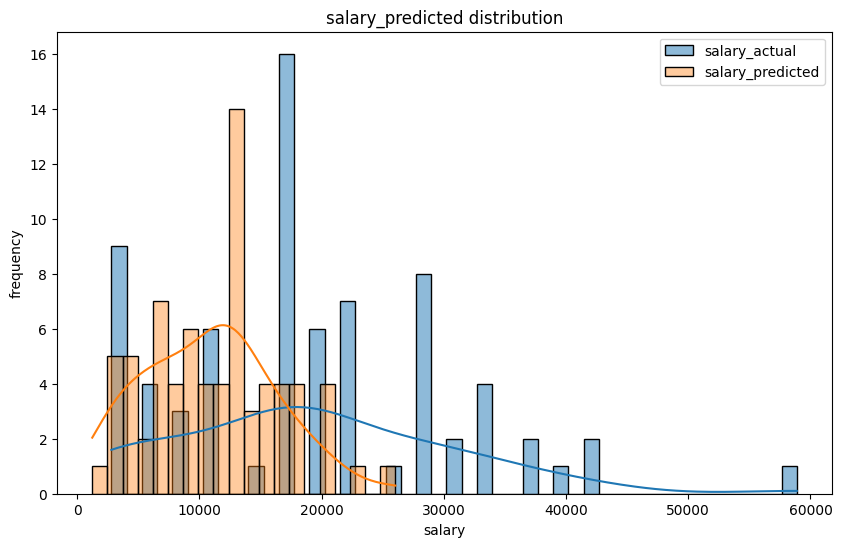

357.csv
я тут
(1578, 11)
1)  [15000.0, 19750.0, 24500.0, 29250.0, 34000.0, 38750.0, 43500.0, 48250.0, 53000.0, 57750.0, 62500.0, 67250.0, 72000.0, 76750.0, 81500.0, 86250.0, 91000.0, 95750.0, 100500.0, 105250.0, 110000.0]
2)  [18595.6876073627, 22637.46139828369, 26679.235189204686, 30721.008980125684, 34762.78277104668, 38804.55656196767, 42846.33035288866, 46888.10414380966, 50929.877934730655, 54971.65172565165, 59013.42551657264, 63055.19930749363, 67096.97309841463, 71138.74688933563, 75180.52068025662, 79222.29447117762, 83264.06826209862, 87305.84205301962, 91347.61584394061, 95389.38963486158, 99431.1634257826]
1.1752265826132797


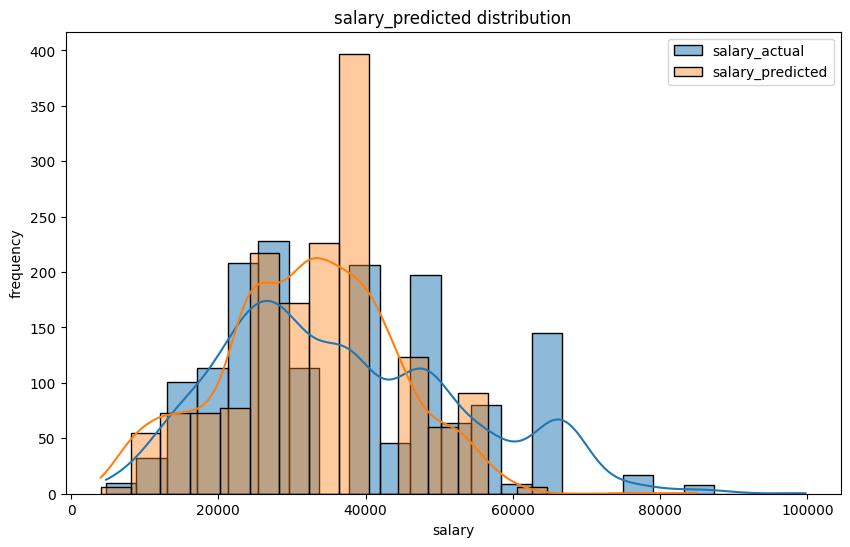

992.csv
я тут
(6999, 11)
1)  [11811.0, 20720.450000000004, 29629.899999999998, 38539.350000000006, 47448.8, 56358.25, 65267.7, 74177.15, 83086.6, 91996.04999999999, 100905.5, 109814.95000000001, 118724.4, 127633.85, 136543.30000000005, 145452.75, 154362.2, 163271.65000000002, 172181.1, 181090.55000000005, 190000.00000000003]
2)  [17909.44316440524, 24855.871812017547, 31802.30045962985, 38748.72910724216, 45695.15775485447, 52641.58640246677, 59588.01505007908, 66534.44369769139, 73480.8723453037, 80427.300992916, 87373.72964052831, 94320.15828814064, 101266.58693575292, 108213.01558336522, 115159.44423097753, 122105.87287858984, 129052.30152620214, 135998.73017381446, 142945.15882142674, 149891.58746903908, 156838.0161166514]
1.2184646138860602


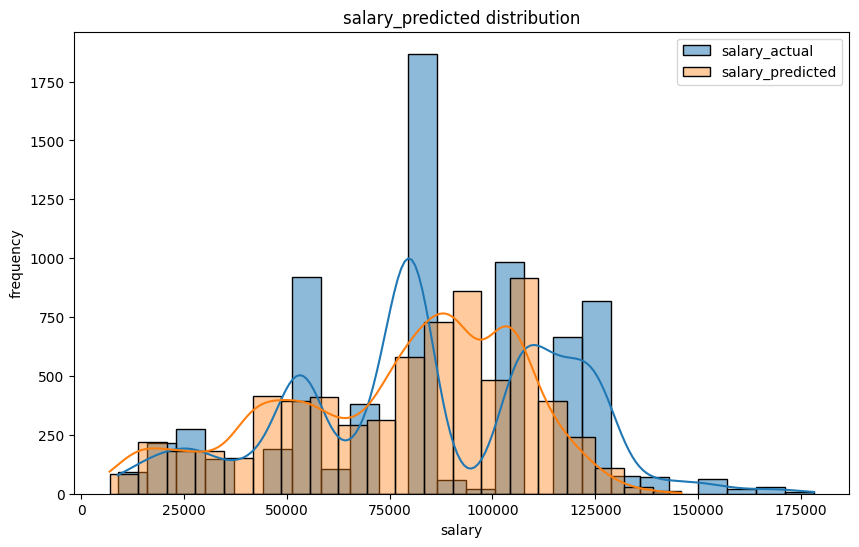

742.csv
я тут
(892, 11)
1)  [12130.0, 16223.5, 20317.0, 24410.5, 28504.0, 32597.5, 36691.0, 40784.5, 44878.0, 48971.5, 53065.0, 57158.5, 61252.0, 65345.5, 69439.0, 73532.5, 77626.0, 81719.5, 85813.0, 89906.5, 94000.0]
2)  [11939.600100013915, 15457.365448329518, 18975.13079664512, 22492.896144960723, 26010.66149327632, 29528.42684159192, 33046.192189907524, 36563.95753822313, 40081.72288653873, 43599.48823485433, 47117.25358316993, 50635.01893148553, 54152.78427980113, 57670.54962811674, 61188.31497643233, 64706.08032474794, 68223.84567306354, 71741.61102137915, 75259.37636969474, 78777.14171801036, 82294.90706632596]
1.22491040241905


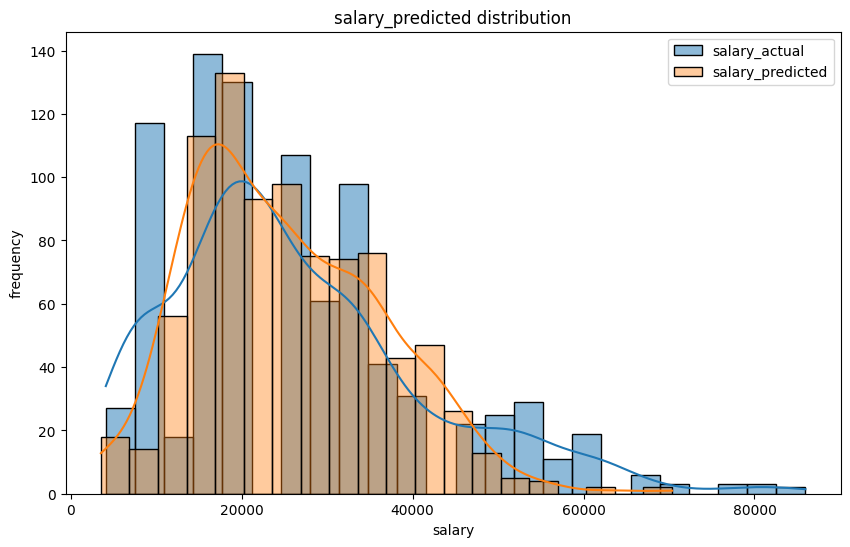

921.csv
я тут
(975, 11)
1)  [11600.0, 16020.0, 20440.0, 24860.0, 29280.0, 33700.0, 38120.0, 42540.0, 46960.0, 51380.0, 55800.0, 60220.0, 64640.0, 69060.0, 73480.0, 77900.0, 82320.0, 86740.0, 91160.0, 95580.0, 100000.0]
2)  [15660.835852546054, 18752.290418645178, 21843.744984744306, 24935.199550843434, 28026.65411694256, 31118.108683041683, 34209.56324914081, 37301.01781523994, 40392.47238133907, 43483.92694743819, 46575.381513537315, 49666.83607963644, 52758.29064573557, 55849.7452118347, 58941.19977793382, 62032.65434403295, 65124.10891013207, 68215.5634762312, 71307.01804233032, 74398.47260842945, 77489.92717452858]
1.4297476820360546


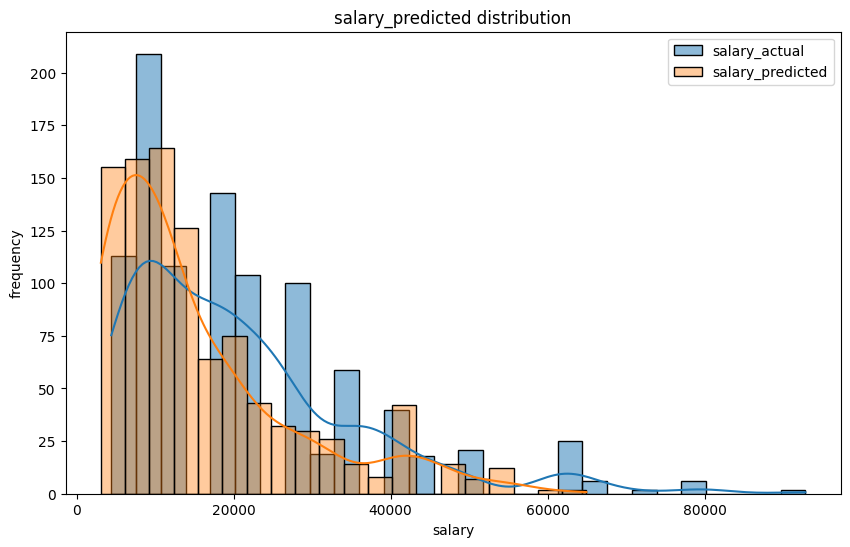

23.csv
я тут
(8076, 11)
1)  [12000.0, 16850.0, 21700.0, 26550.0, 31400.0, 36250.0, 41100.0, 45950.0, 50800.0, 55650.0, 60500.0, 65350.0, 70200.0, 75050.0, 79900.0, 84750.0, 89600.0, 94450.0, 99300.0, 104150.0, 109000.0]
2)  [14184.720459679538, 18363.239491778728, 22541.758523877914, 26720.27755597711, 30898.796588076297, 35077.31562017549, 39255.83465227467, 43434.35368437387, 47612.87271647305, 51791.39174857225, 55969.91078067143, 60148.42981277063, 64326.948844869825, 68505.46787696902, 72683.9869090682, 76862.50594116742, 81041.02497326658, 85219.54400536578, 89398.06303746496, 93576.58206956417, 97755.10110166336]
1.1606983150591204


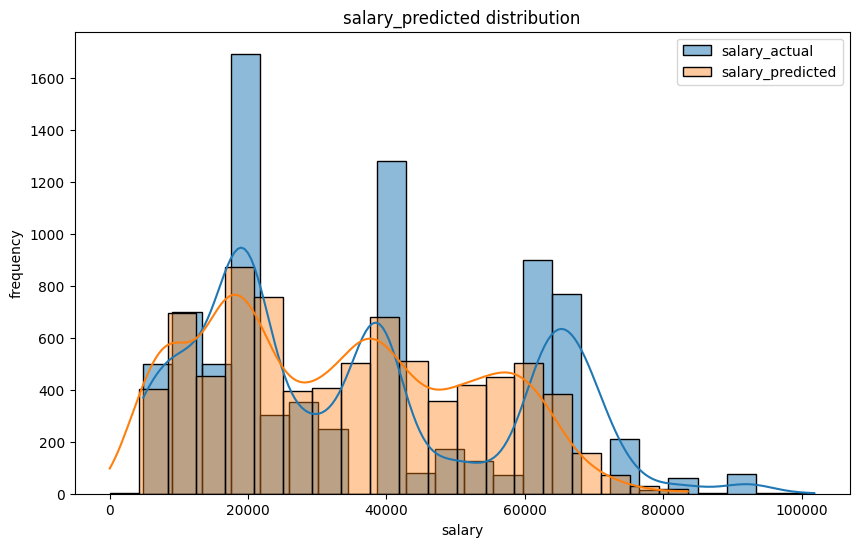

765.csv
я тут
(10555, 11)
1)  [12152.0, 16294.399999999998, 20436.800000000003, 24579.199999999997, 28721.6, 32864.0, 37006.399999999994, 41148.8, 45291.2, 49433.600000000006, 53576.0, 57718.399999999994, 61860.8, 66003.2, 70145.59999999998, 74288.0, 78430.4, 82572.79999999999, 86715.2, 90857.59999999998, 94999.99999999999]
2)  [12025.38134944273, 15660.447754423478, 19295.51415940423, 22930.580564384974, 26565.646969365727, 30200.713374346473, 33835.77977932722, 37470.84618430797, 41105.912589288724, 44740.97899426948, 48376.045399250215, 52011.11180423097, 55646.17820921172, 59281.244614192474, 62916.31101917321, 66551.37742415396, 70186.44382913472, 73821.51023411547, 77456.57663909622, 81091.64304407696, 84726.70944905771]
1.1395665274021143


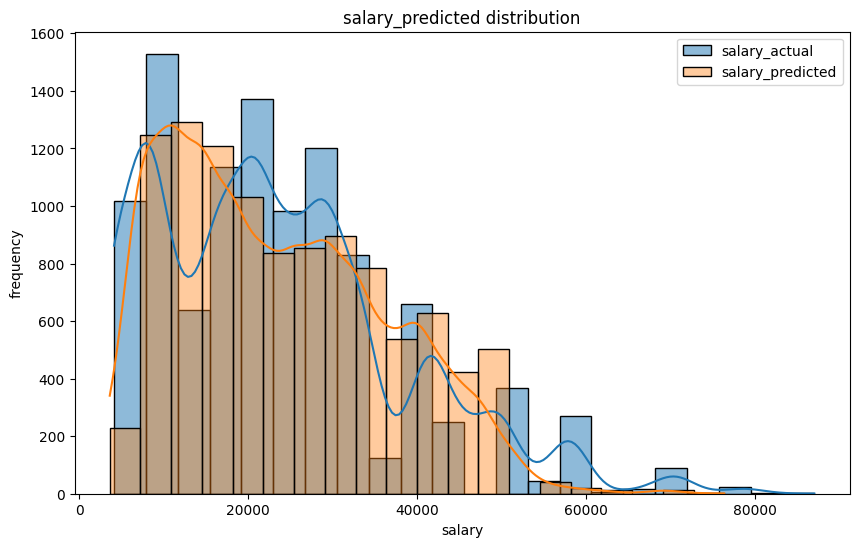

898.csv
я тут
(1232, 11)
1)  [15000.0, 23250.0, 31500.0, 39750.0, 48000.0, 56250.0, 64500.0, 72750.0, 81000.0, 89250.0, 97500.0, 105750.0, 114000.0, 122250.0, 130500.0, 138750.0, 147000.0, 155250.0, 163500.0, 171750.0, 180000.0]
2)  [22786.29747599081, 29654.953830682425, 36523.61018537404, 43392.26654006566, 50260.92289475728, 57129.579249448885, 63998.23560414052, 70866.89195883213, 77735.54831352376, 84604.20466821536, 91472.86102290699, 98341.51737759859, 105210.17373229022, 112078.83008698185, 118947.48644167345, 125816.14279636508, 132684.79915105668, 139553.45550574828, 146422.11186043994, 153290.76821513154, 160159.42456982314]
1.2011082770744328


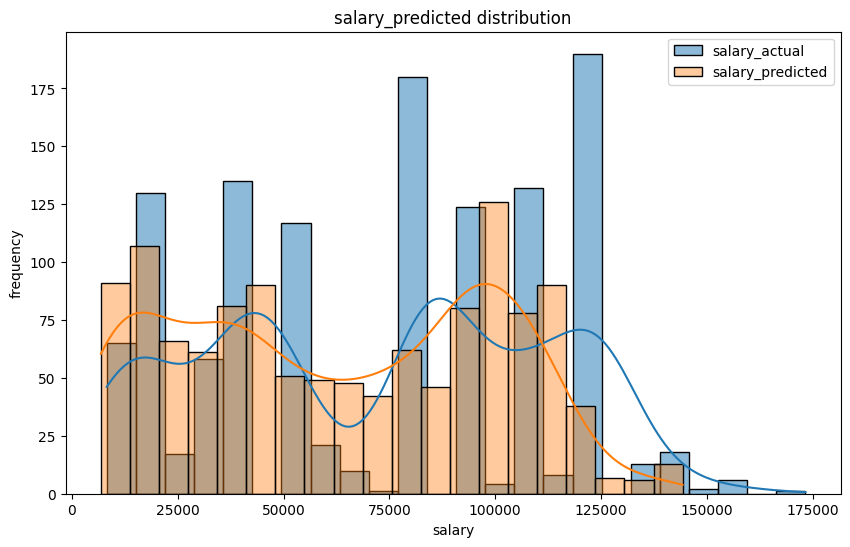

43.csv
я тут
(120480, 11)
1)  [11534.0, 16432.299999999996, 21330.6, 26228.9, 31127.199999999997, 36025.5, 40923.8, 45822.1, 50720.4, 55618.70000000001, 60517.0, 65415.30000000001, 70313.6, 75211.9, 80110.20000000001, 85008.5, 89906.80000000002, 94805.1, 99703.40000000001, 104601.70000000001, 109500.00000000001]
2)  [14038.983113160568, 18155.137714662895, 22271.29231616522, 26387.446917667556, 30503.601519169883, 34619.75612067222, 38735.910722174536, 42852.06532367687, 46968.219925179204, 51084.374526681524, 55200.52912818385, 59316.68372968619, 63432.83833118851, 67548.99293269083, 71665.14753419318, 75781.3021356955, 79897.45673719782, 84013.61133870017, 88129.76594020249, 92245.9205417048, 96362.07514320713]
1.130517546231522


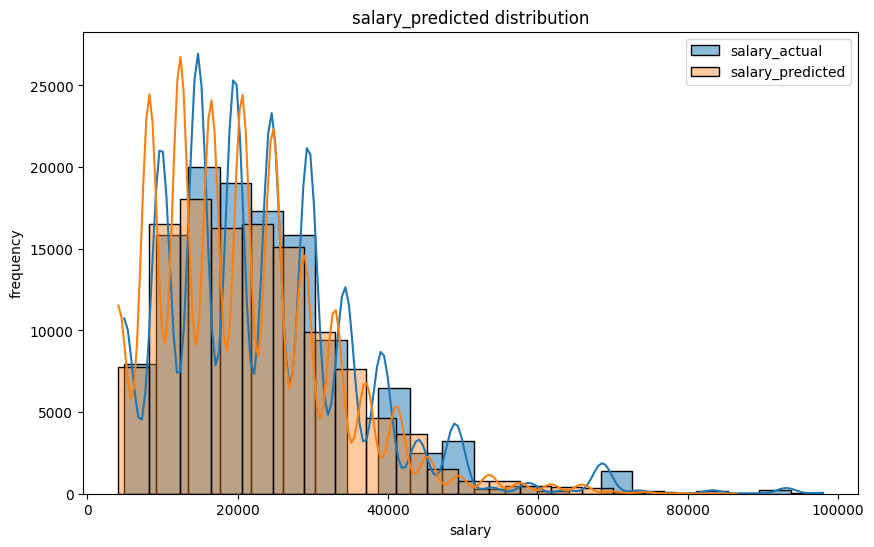

85.csv
я тут
(22579, 11)
1)  [12000.0, 16750.0, 21500.0, 26250.0, 31000.0, 35750.0, 40500.0, 45250.0, 50000.0, 54750.0, 59500.0, 64250.0, 69000.0, 73750.0, 78500.0, 83250.0, 88000.0, 92750.0, 97500.0, 102250.0, 107000.0]
2)  [13908.446116831372, 17890.48939921053, 21872.53268158969, 25854.575963968855, 29836.61924634802, 33818.662528727175, 37800.70581110634, 41782.7490934855, 45764.792375864665, 49746.83565824382, 53728.878940622984, 57710.92222300214, 61692.965505381304, 65675.00878776047, 69657.05207013962, 73639.09535251878, 77621.13863489794, 81603.1819172771, 85585.22519965627, 89567.26848203543, 93549.3117644146]
1.1928549398292847


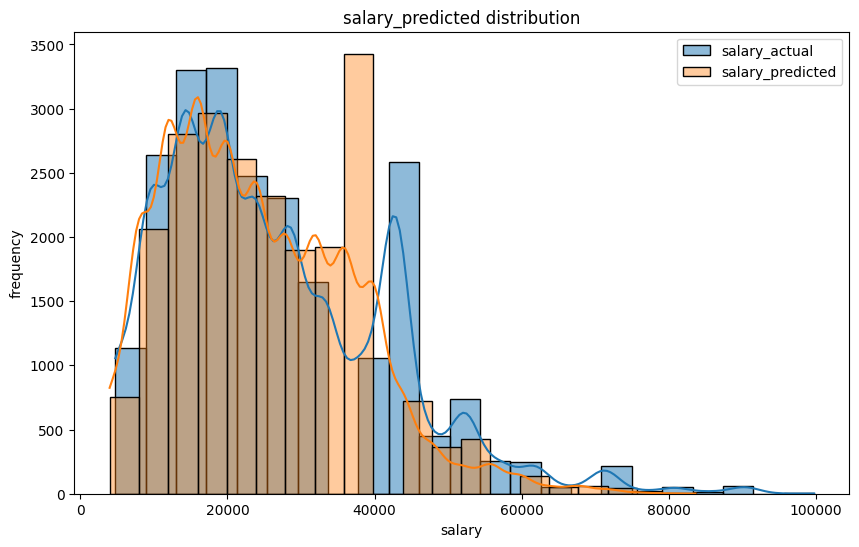

856.csv
я тут
(14100, 11)
1)  [12000.0, 15850.0, 19700.0, 23550.0, 27400.0, 31250.0, 35100.0, 38950.0, 42800.0, 46650.0, 50500.0, 54350.0, 58200.0, 62050.0, 65900.0, 69750.0, 73600.0, 77450.0, 81300.0, 85150.0, 89000.0]
2)  [12426.133278403926, 15781.616508190657, 19137.09973797739, 22492.582967764116, 25848.06619755085, 29203.54942733758, 32559.03265712431, 35914.51588691103, 39269.99911669777, 42625.482346484496, 45980.96557627122, 49336.44880605796, 52691.932035844686, 56047.41526563141, 59402.89849541815, 62758.381725204876, 66113.86495499162, 69469.34818477833, 72824.83141456507, 76180.3146443518, 79535.79787413853]
1.1473757239563673


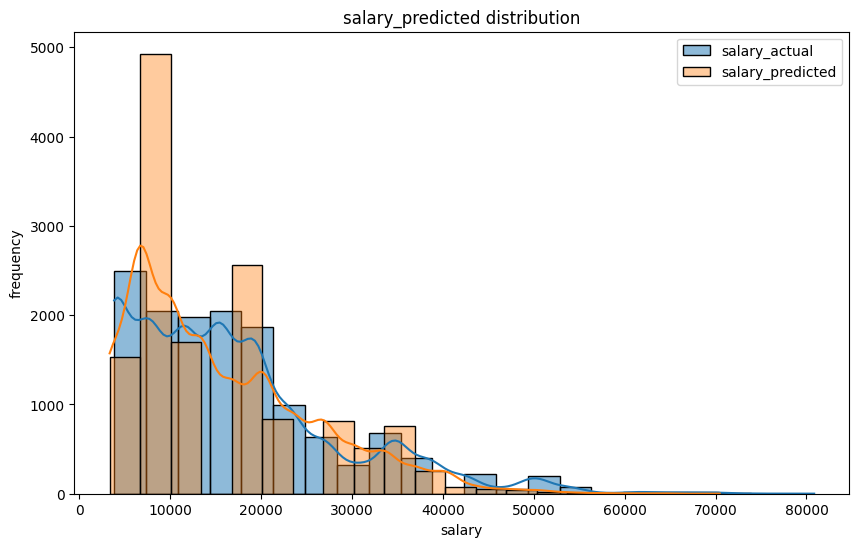

52.csv
я тут
(15208, 11)
1)  [11692.0, 19607.4, 27522.800000000003, 35438.2, 43353.600000000006, 51269.0, 59184.399999999994, 67099.79999999999, 75015.2, 82930.59999999998, 90846.0, 98761.4, 106676.79999999999, 114592.2, 122507.59999999998, 130423.00000000001, 138338.39999999997, 146253.8, 154169.19999999998, 162084.59999999998, 169999.99999999997]
2)  [15653.042510927264, 19096.316979990654, 22539.591449054053, 25982.865918117444, 29426.140387180843, 32869.41485624424, 36312.68932530764, 39755.963794371026, 43199.238263434425, 46642.512732497824, 50085.78720156122, 53529.06167062461, 56972.33613968801, 60415.610608751405, 63858.885077814804, 67302.15954687819, 70745.4340159416, 74188.70848500499, 77631.98295406837, 81075.25742313178, 84518.53189219518]
2.2988001889239644


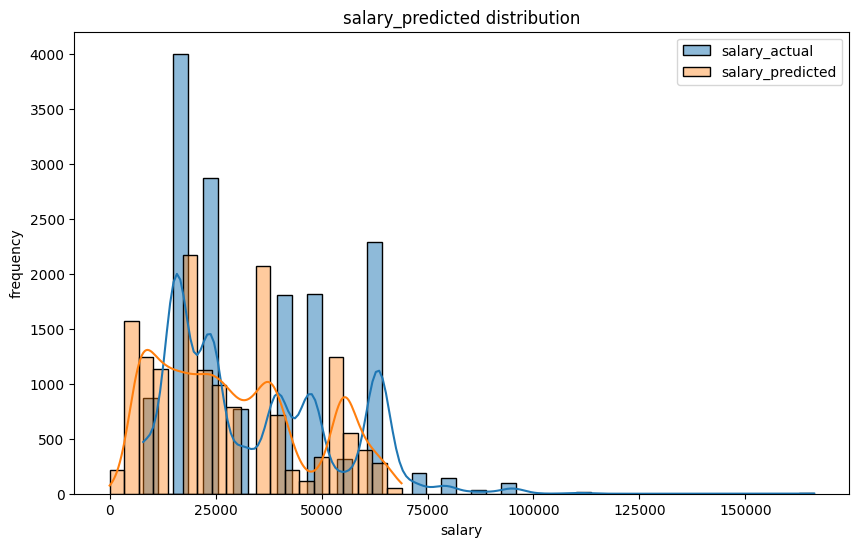

833.csv
я тут
(6209, 11)
1)  [12000.0, 20308.049999999996, 28616.100000000002, 36924.149999999994, 45232.2, 53540.25, 61848.3, 70156.35, 78464.4, 86772.45000000001, 95080.5, 103388.54999999999, 111696.6, 120004.65, 128312.69999999997, 136620.75, 144928.8, 153236.84999999998, 161544.9, 169852.94999999995, 178160.99999999997]
2)  [15698.360561963738, 21655.988700099275, 27613.616838234804, 33571.24497637034, 39528.87311450588, 45486.50125264141, 51444.12939077694, 57401.75752891248, 63359.385667048016, 69317.01380518355, 75274.64194331909, 81232.27008145463, 87189.89821959015, 93147.52635772568, 99105.15449586122, 105062.78263399676, 111020.4107721323, 116978.03891026783, 122935.66704840337, 128893.29518653889, 134850.92332467443]
1.3945230899557348


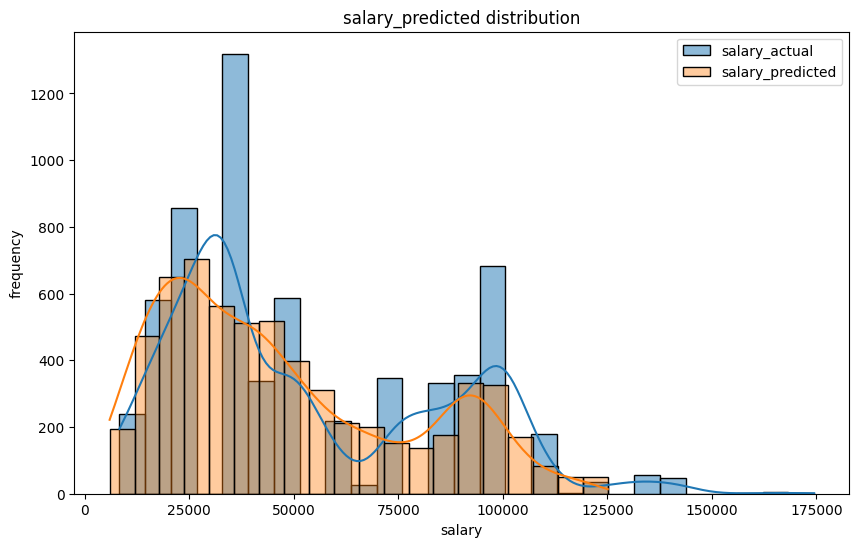

49.csv
я тут
(57268, 11)
1)  [11700.0, 20115.0, 28530.0, 36945.0, 45360.0, 53775.0, 62190.0, 70605.0, 79020.0, 87435.0, 95850.0, 104265.0, 112680.0, 121095.0, 129510.0, 137925.0, 146340.0, 154755.0, 163170.0, 171585.0, 180000.0]
2)  [13821.447936683431, 16413.42989722646, 19005.41185776949, 21597.39381831252, 24189.375778855545, 26781.357739398576, 29373.3396999416, 31965.321660484635, 34557.30362102766, 37149.285581570686, 39741.26754211371, 42333.24950265675, 44925.23146319977, 47517.213423742796, 50109.195384285835, 52701.17734482886, 55293.15930537188, 57885.14126591492, 60477.123226457945, 63069.10518700097, 65661.08714754399]
3.2465503726874063


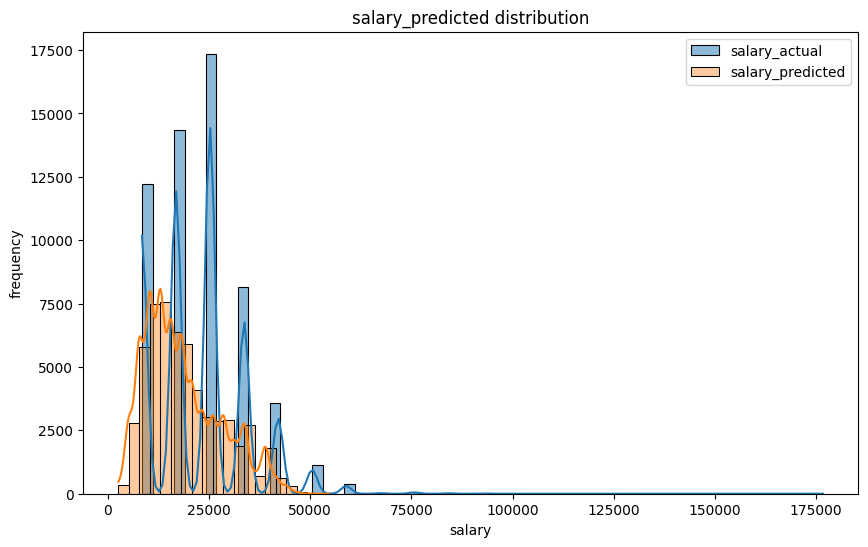

54.csv
я тут
(40003, 11)
1)  [12000.0, 27900.0, 43800.0, 59700.0, 75600.0, 91500.0, 107400.0, 123300.0, 139200.0, 155100.0, 171000.0, 186900.0, 202800.0, 218700.0, 234600.0, 250500.0, 266400.0, 282300.0, 298200.0, 314100.0, 330000.0]
2)  [10241.151202513734, 15733.963895484107, 21226.77658845448, 26719.589281424847, 32212.401974395223, 37705.214667365595, 43198.02736033596, 48690.84005330633, 54183.652746276704, 59676.46543924708, 65169.27813221744, 70662.09082518783, 76154.90351815819, 81647.71621112854, 87140.52890409893, 92633.34159706929, 98126.15429003967, 103618.96698301003, 109111.77967598042, 114604.59236895078, 120097.40506192115]
2.894691825255321


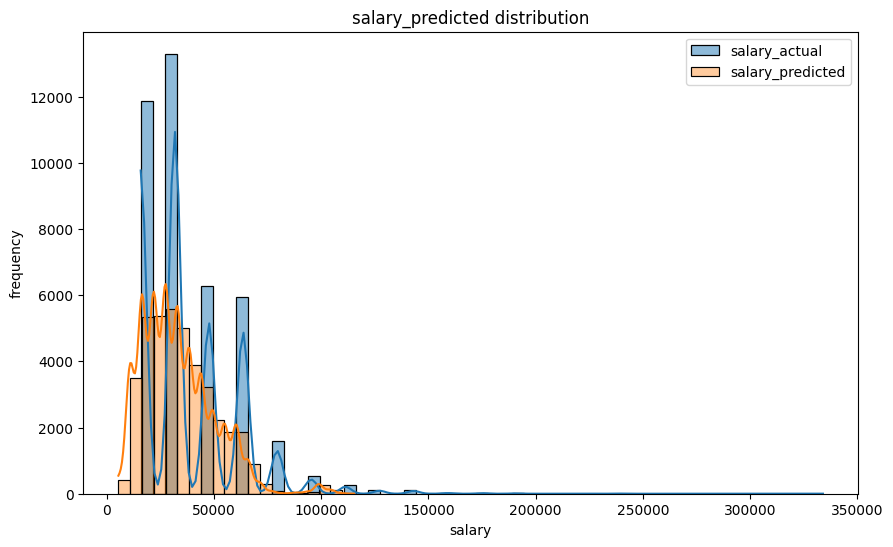

119.csv
я тут
(6769, 11)
1)  [14300.0, 22585.0, 30870.0, 39155.0, 47440.0, 55725.0, 64010.0, 72295.0, 80580.0, 88865.0, 97150.0, 105435.0, 113720.0, 122005.0, 130290.0, 138575.0, 146860.0, 155145.0, 163430.0, 171715.0, 180000.0]
2)  [15524.151720532856, 20299.17602544791, 25074.20033036296, 29849.22463527802, 34624.248940193065, 39399.273245108125, 44174.297550023184, 48949.32185493823, 53724.34615985329, 58499.37046476833, 63274.39476968339, 68049.41907459844, 72824.44337951351, 77599.46768442856, 82374.4919893436, 87149.51629425865, 91924.54059917372, 96699.56490408877, 101474.58920900381, 106249.61351391887, 111024.63781883391]
1.7350697024666537


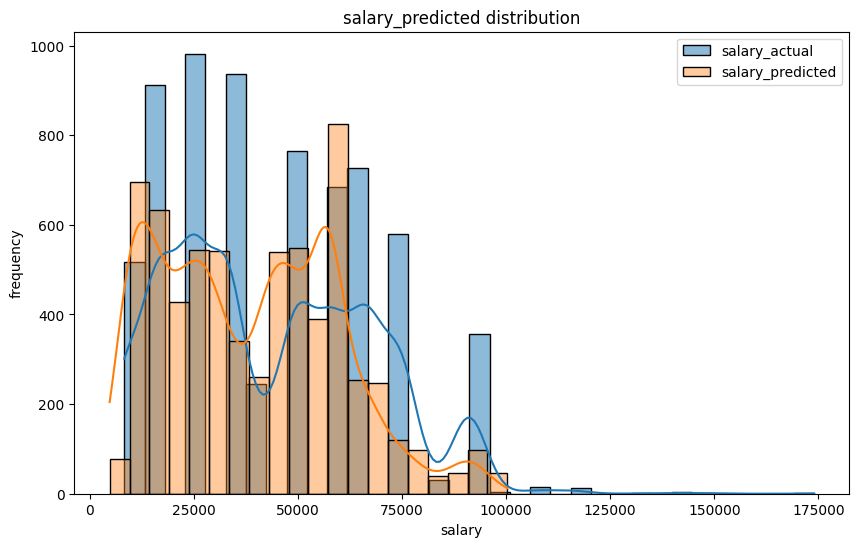

16.csv
я тут
(49797, 11)
1)  [15000.0, 24250.0, 33500.0, 42750.0, 52000.0, 61250.0, 70500.0, 79750.0, 89000.0, 98250.0, 107500.0, 116750.0, 126000.0, 135250.0, 144500.0, 153750.0, 163000.0, 172250.0, 181500.0, 190750.0, 200000.0]
2)  [16899.951804167817, 23021.015892238924, 29142.079980310038, 35263.14406838115, 41384.20815645227, 47505.272244523374, 53626.33633259448, 59747.400420665595, 65868.46450873671, 71989.52859680782, 78110.59268487894, 84231.65677295005, 90352.72086102117, 96473.78494909228, 102594.84903716337, 108715.91312523448, 114836.9772133056, 120958.04130137671, 127079.10538944782, 133200.16947751894, 139321.23356559005]
1.511175159565253


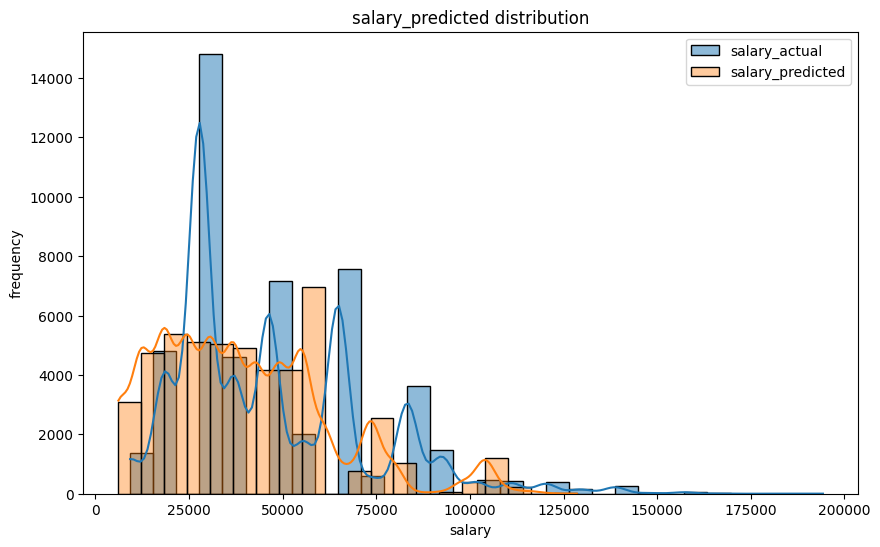

31.csv
я тут
(24559, 11)
1)  [12000.0, 19600.0, 27200.0, 34800.0, 42400.0, 50000.0, 57600.0, 65200.0, 72800.0, 80400.0, 88000.0, 95600.0, 103200.0, 110800.0, 118400.0, 126000.0, 133600.0, 141200.0, 148800.0, 156400.0, 164000.0]
2)  [14608.15818836679, 19831.093877649706, 25054.029566932622, 30276.965256215542, 35499.90094549845, 40722.83663478137, 45945.77232406428, 51168.708013347205, 56391.643702630114, 61614.57939191304, 66837.51508119595, 72060.45077047887, 77283.3864597618, 82506.32214904472, 87729.25783832761, 92952.19352761054, 98175.12921689346, 103398.06490617638, 108621.00059545928, 113843.9362847422, 119066.87197402513]
1.4551203484267758


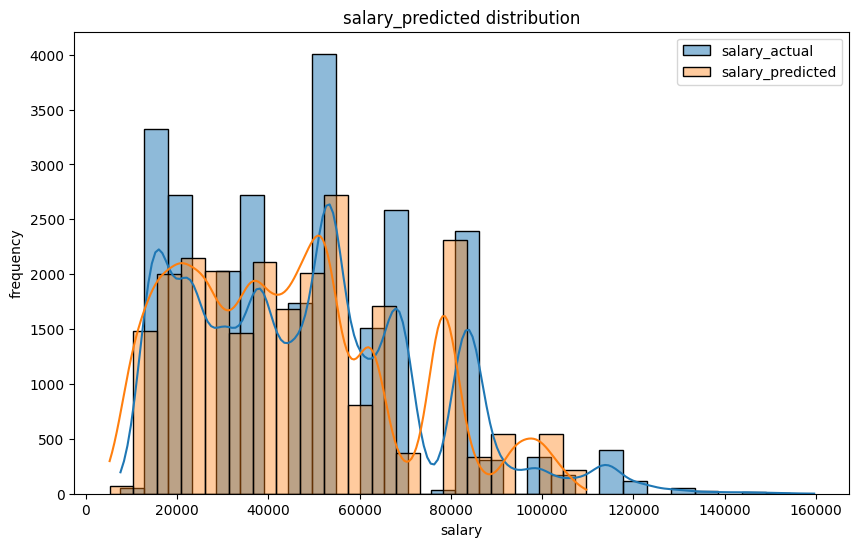

27.csv
я тут
(65396, 11)
1)  [12000.0, 29400.0, 46800.0, 64200.0, 81600.0, 99000.0, 116400.0, 133800.0, 151200.0, 168600.0, 186000.0, 203400.0, 220800.0, 238200.0, 255600.0, 273000.0, 290400.0, 307800.0, 325200.0, 342600.0, 360000.0]
2)  [12783.7957912747, 19259.72339583, 25735.651000385304, 32211.5786049406, 38687.5062094959, 45163.4338140512, 51639.3614186065, 58115.2890231618, 64591.216627717105, 71067.1442322724, 77543.0718368277, 84018.999441383, 90494.9270459383, 96970.8546504936, 103446.78225504889, 109922.70985960419, 116398.63746415949, 122874.56506871479, 129350.4926732701, 135826.42027782538, 142302.34788238068]
2.6868737673596734


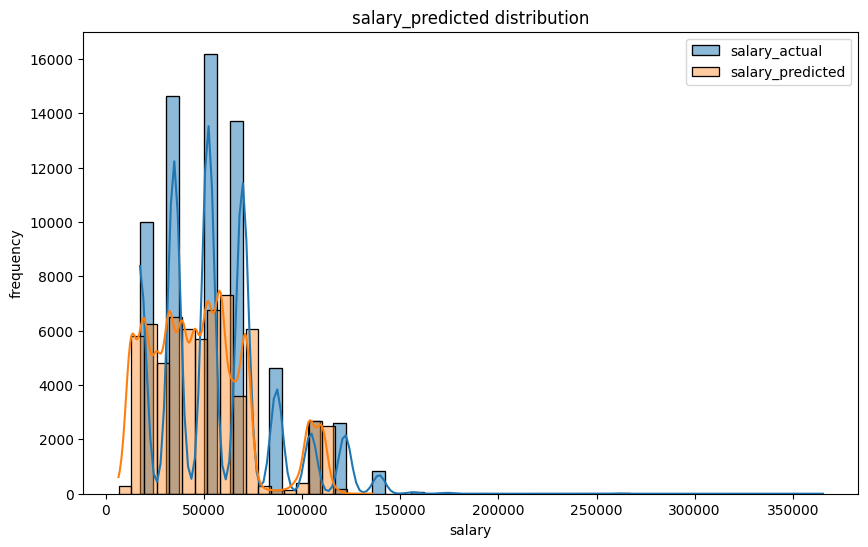

283.csv
я тут
(22094, 11)
1)  [11799.0, 36209.05, 60619.100000000006, 85029.15, 109439.20000000001, 133849.25, 158259.3, 182669.35, 207079.4, 231489.44999999995, 255899.50000000003, 280309.54999999993, 304719.6, 329129.64999999997, 353539.69999999995, 377949.75, 402359.79999999993, 426769.85, 451179.89999999997, 475589.94999999995, 499999.99999999994]


<ipython-input-37-941863b702fe>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2)  [10442.363499210245, 19593.079517837185, 28743.795536464135, 37894.51155509107, 47045.22757371802, 56195.943592344964, 65346.65961097191, 74497.37562959886, 83648.09164822579, 92798.80766685275, 101949.52368547968, 111100.23970410661, 120250.95572273358, 129401.67174136051, 138552.38775998744, 147703.1037786144, 156853.81979724133, 166004.5358158683, 175155.25183449523, 184305.96785312216, 193456.6838717491]
2.5405297923511534


<ipython-input-37-941863b702fe>:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



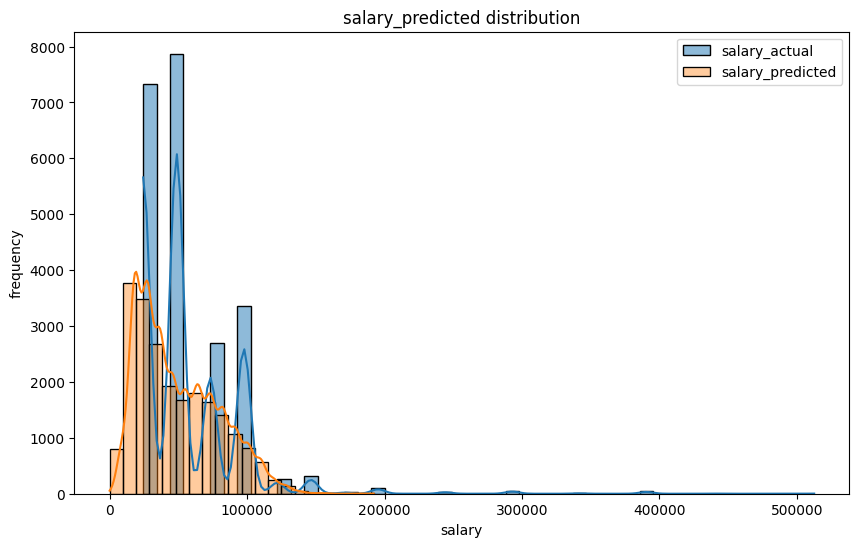

919.csv
я тут
(10707, 11)
1)  [12000.0, 23475.0, 34950.0, 46425.0, 57900.0, 69375.0, 80850.0, 92325.0, 103800.0, 115275.0, 126750.0, 138225.0, 149700.0, 161175.0, 172650.0, 184125.0, 195600.0, 207075.0, 218550.0, 230025.0, 241500.0]
2)  [16915.815271525906, 22253.816487832228, 27591.817704138542, 32929.818920444864, 38267.82013675119, 43605.8213530575, 48943.82256936382, 54281.823785670145, 59619.82500197647, 64957.82621828279, 70295.82743458913, 75633.82865089542, 80971.82986720174, 86309.83108350806, 91647.83229981438, 96985.8335161207, 102323.83473242703, 107661.83594873335, 112999.83716503967, 118337.838381346, 123675.83959765232]
2.1496810388402703


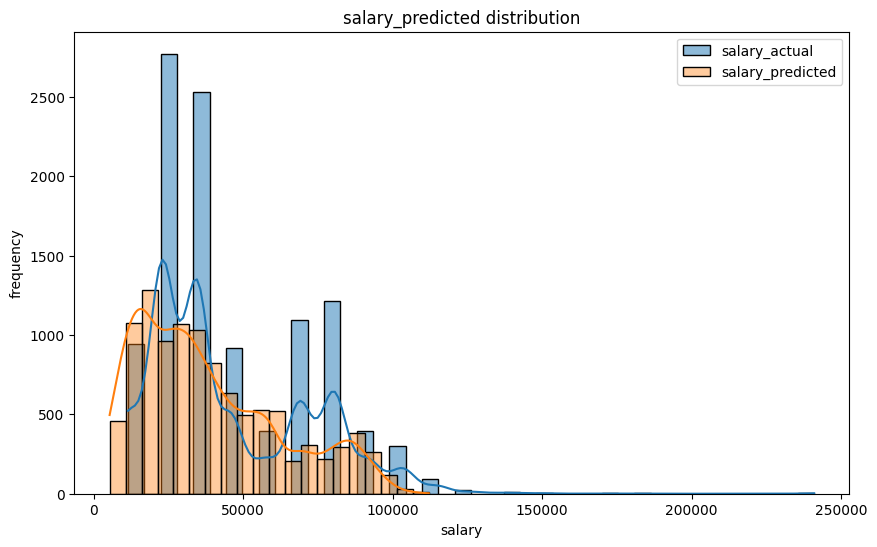

33.csv
я тут
(116470, 11)
1)  [11700.0, 21115.0, 30530.0, 39945.0, 49360.0, 58775.0, 68190.0, 77605.0, 87020.0, 96435.0, 105850.0, 115265.0, 124680.0, 134095.0, 143510.0, 152925.0, 162340.0, 171755.0, 181170.0, 190585.0, 200000.0]
2)  [12824.274653986617, 16277.872577985501, 19731.47050198439, 23185.068425983278, 26638.66634998216, 30092.26427398104, 33545.862197979935, 36999.46012197882, 40453.0580459777, 43906.65596997658, 47360.253893975474, 50813.851817974355, 54267.44974197325, 57721.04766597213, 61174.64558997101, 64628.243513969894, 68081.84143796877, 71535.43936196767, 74989.03728596655, 78442.63520996543, 81896.23313396431]
2.726142477262805


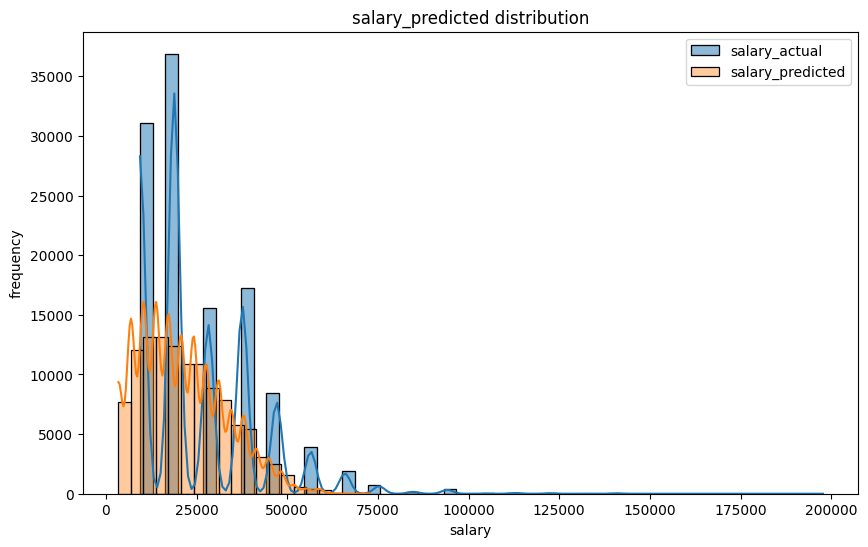

663.csv
я тут
(11770, 11)
1)  [15000.0, 25000.0, 35000.0, 45000.0, 55000.0, 65000.0, 75000.0, 85000.0, 95000.0, 105000.0, 115000.0, 125000.0, 135000.0, 145000.0, 155000.0, 165000.0, 175000.0, 185000.0, 195000.0, 205000.0, 215000.0]


<ipython-input-37-941863b702fe>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2)  [29109.918603224127, 33988.41475995783, 38866.910916691544, 43745.407073425245, 48623.90323015896, 53502.39938689266, 58380.89554362638, 63259.39170036008, 68137.8878570938, 73016.38401382751, 77894.8801705612, 82773.37632729491, 87651.87248402863, 92530.36864076235, 97408.86479749603, 102287.36095422975, 107165.85711096346, 112044.35326769718, 116922.84942443087, 121801.34558116458, 126679.8417378983]
2.049812007373863


<ipython-input-37-941863b702fe>:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



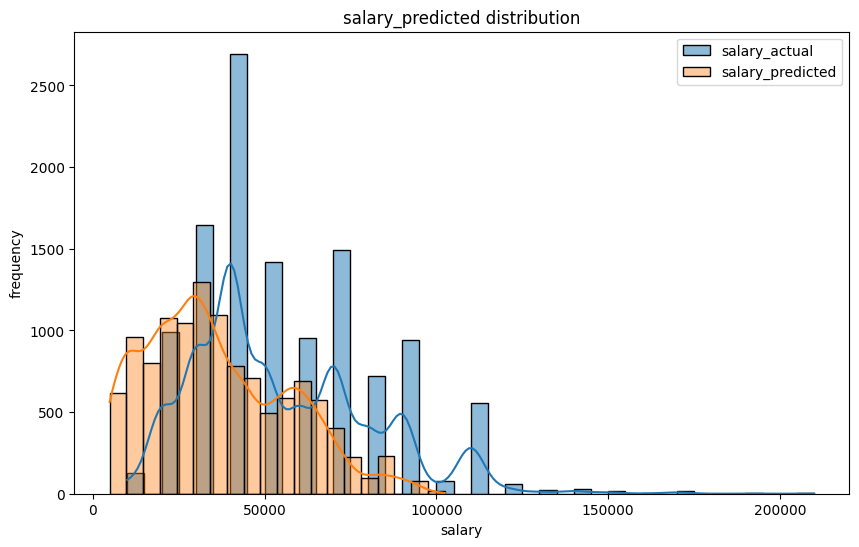

69.csv
я тут
(9091, 11)
1)  [12000.0, 21600.0, 31200.0, 40800.0, 50400.0, 60000.0, 69600.0, 79200.0, 88800.0, 98400.0, 108000.0, 117600.0, 127200.0, 136800.0, 146400.0, 156000.0, 165600.0, 175200.0, 184800.0, 194400.0, 204000.0]
2)  [15803.38356483512, 18764.199626506765, 21725.015688178413, 24685.831749850062, 27646.64781152171, 30607.46387319336, 33568.279934865, 36529.09599653665, 39489.9120582083, 42450.72811987995, 45411.544181551595, 48372.360243223244, 51333.17630489489, 54293.99236656654, 57254.80842823819, 60215.62448990984, 63176.44055158149, 66137.25661325314, 69098.07267492478, 72058.88873659643, 75019.70479826808]
3.242349338844079


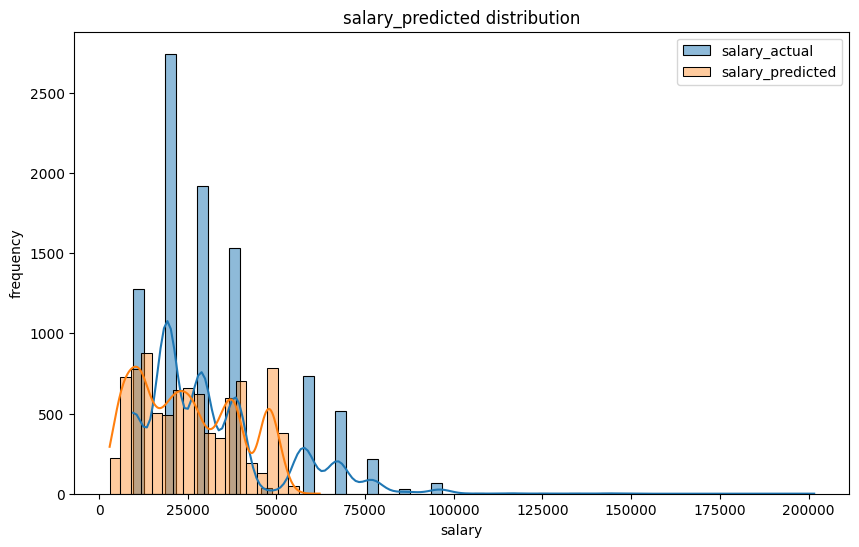

128.csv
я тут
(5419, 11)
1)  [11589.0, 16759.549999999996, 21930.1, 27100.65, 32271.199999999997, 37441.75, 42612.3, 47782.85, 52953.4, 58123.95000000001, 63294.49999999999, 68465.05000000002, 73635.6, 78806.15000000001, 83976.70000000001, 89147.25, 94317.80000000002, 99488.35, 104658.90000000001, 109829.45000000001, 115000.00000000001]
2)  [12484.65941930822, 14174.991867758292, 15865.324316208364, 17555.656764658434, 19245.9892131085, 20936.321661558577, 22626.654110008647, 24316.986558458717, 26007.319006908787, 27697.65145535886, 29387.98390380893, 31078.316352258997, 32768.64880070908, 34458.981249159144, 36149.31369760922, 37839.64614605928, 39529.97859450936, 41220.31104295942, 42910.6434914095, 44600.97593985958, 46291.30838830965]
3.0588953106479537


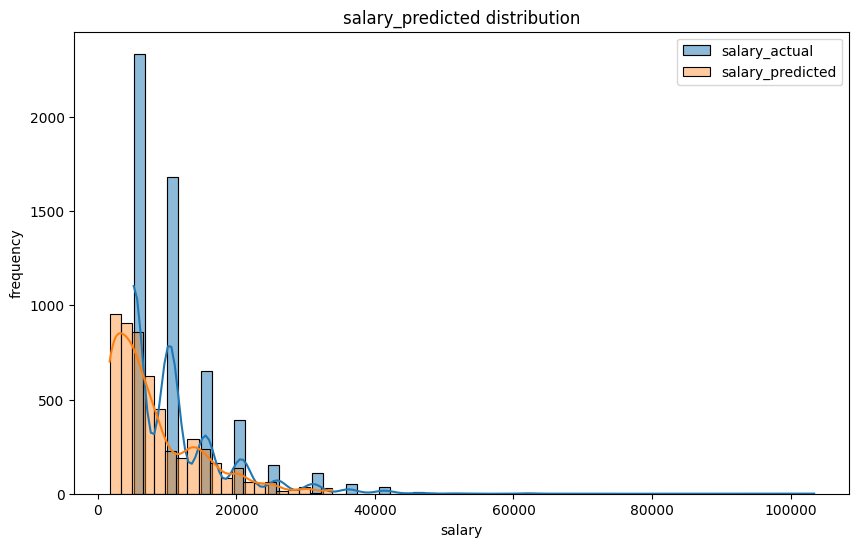

336.csv
я тут
(62622, 11)
1)  [12590.75, 24461.2125, 36331.675, 48202.1375, 60072.600000000006, 71943.0625, 83813.525, 95683.9875, 107554.45, 119424.91249999998, 131295.375, 143165.83749999997, 155036.3, 166906.76249999998, 178777.22499999998, 190647.6875, 202518.14999999997, 214388.6125, 226259.07499999998, 238129.53749999998, 249999.99999999997]
2)  [14040.65824981423, 19049.307040236155, 24057.95583065808, 29066.604621080005, 34075.25341150193, 39083.902201923855, 44092.55099234578, 49101.199782767704, 54109.84857318963, 59118.497363611554, 64127.14615403347, 69135.7949444554, 74144.44373487732, 79153.09252529925, 84161.74131572117, 89170.3901061431, 94179.03889656502, 99187.68768698694, 104196.33647740887, 109204.9852678308, 114213.63405825272]
2.257136176641373


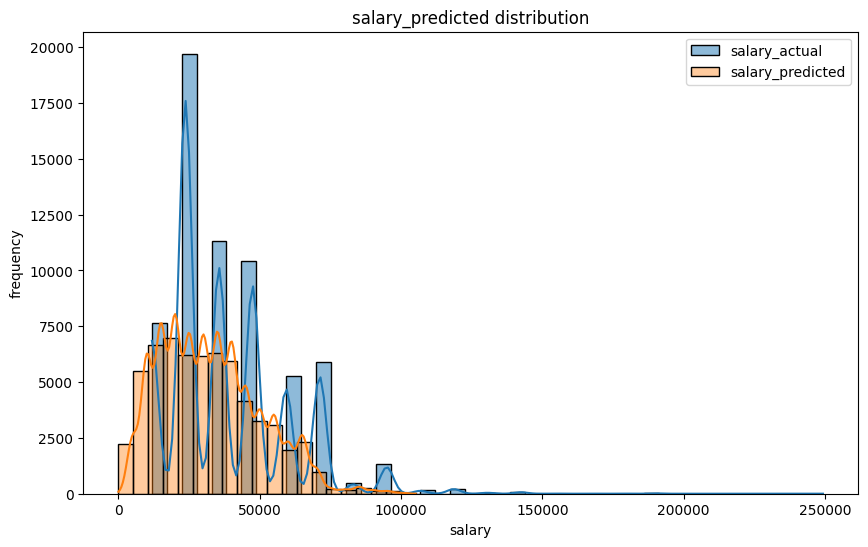

134.csv
я тут
(7333, 11)
1)  [15000.0, 21750.0, 28500.0, 35250.0, 42000.0, 48750.0, 55500.0, 62250.0, 69000.0, 75750.0, 82500.0, 89250.0, 96000.0, 102750.0, 109500.0, 116250.0, 123000.0, 129750.0, 136500.0, 143250.0, 150000.0]
2)  [24487.50751766987, 27594.26483636564, 30701.0221550614, 33807.77947375717, 36914.53679245293, 40021.2941111487, 43128.05142984446, 46234.80874854022, 49341.566067235995, 52448.323385931755, 55555.08070462753, 58661.83802332329, 61768.59534201906, 64875.35266071483, 67982.10997941058, 71088.86729810634, 74195.62461680212, 77302.38193549789, 80409.13925419364, 83515.89657288941, 86622.65389158519]
2.172683382567418


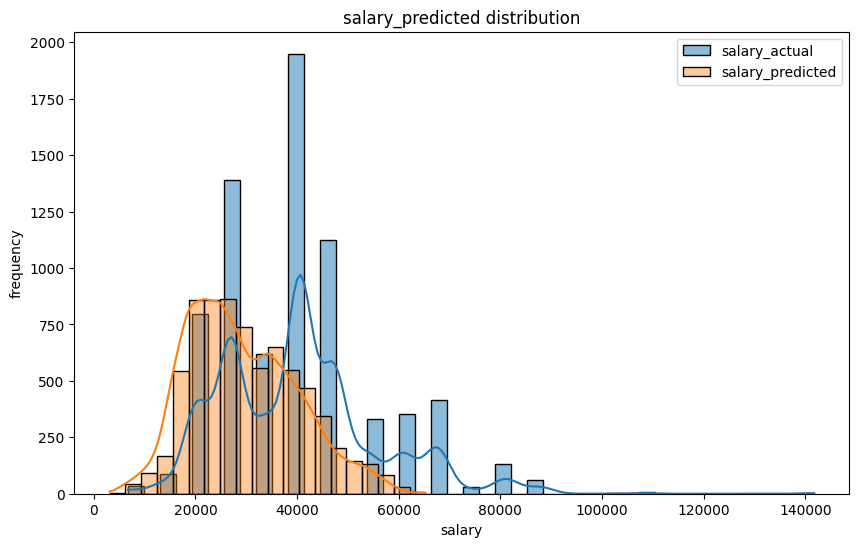

74.csv
я тут
(44968, 11)
1)  [12000.0, 21400.0, 30800.0, 40200.0, 49600.0, 59000.0, 68400.0, 77800.0, 87200.0, 96600.0, 106000.0, 115400.0, 124800.0, 134200.0, 143600.0, 153000.0, 162400.0, 171800.0, 181200.0, 190600.0, 200000.0]
2)  [13127.759088049414, 15519.013376516614, 17910.267664983814, 20301.52195345101, 22692.77624191821, 25084.03053038541, 27475.28481885261, 29866.53910731981, 32257.793395787012, 34649.04768425421, 37040.30197272141, 39431.556261188605, 41822.810549655806, 44214.064838123006, 46605.319126590206, 48996.573415057406, 51387.82770352461, 53779.08199199181, 56170.33628045901, 58561.5905689262, 60952.84485739339]
3.9309913819435027


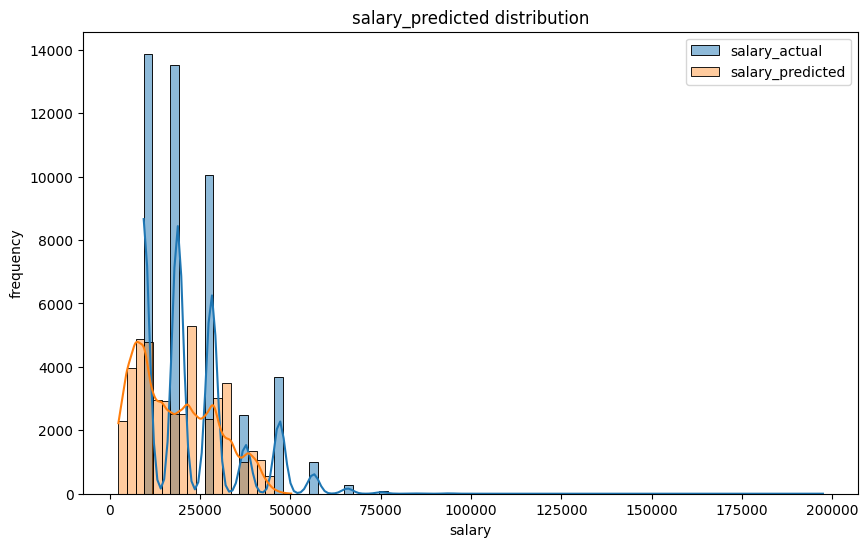

706.csv
я тут
(24526, 11)
1)  [12000.0, 20400.0, 28800.0, 37200.0, 45600.0, 54000.0, 62400.0, 70800.0, 79200.0, 87600.0, 96000.0, 104400.0, 112800.0, 121200.0, 129600.0, 138000.0, 146400.0, 154800.0, 163200.0, 171600.0, 180000.0]
2)  [13189.23233022564, 17594.61069795292, 21999.98906568021, 26405.36743340749, 30810.745801134777, 35216.124168862065, 39621.50253658935, 44026.880904316626, 48432.25927204391, 52837.6376397712, 57243.01600749849, 61648.39437522576, 66053.77274295306, 70459.15111068034, 74864.52947840761, 79269.90784613491, 83675.28621386219, 88080.66458158949, 92486.04294931676, 96891.42131704403, 101296.79968477132]
1.9067601687828517


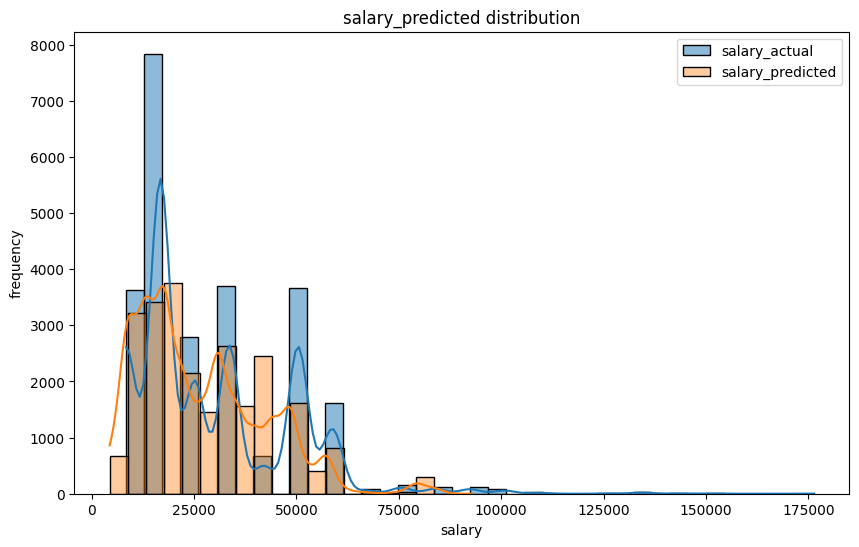

61.csv
я тут
(22279, 11)
1)  [12000.0, 26400.0, 40800.0, 55200.0, 69600.0, 84000.0, 98400.0, 112800.0, 127200.0, 141600.0, 156000.0, 170400.0, 184800.0, 199200.0, 213600.0, 228000.0, 242400.0, 256800.0, 271200.0, 285600.0, 300000.0]
2)  [18455.668093722416, 25706.102683321937, 32956.53727292146, 40206.97186252098, 47457.4064521205, 54707.84104172002, 61958.27563131954, 69208.71022091906, 76459.14481051858, 83709.5794001181, 90960.01398971763, 98210.44857931715, 105460.88316891667, 112711.31775851619, 119961.75234811571, 127212.18693771522, 134462.62152731477, 141713.05611691426, 148963.4907065138, 156213.9252961133, 163464.35988571282]
1.986087843707502


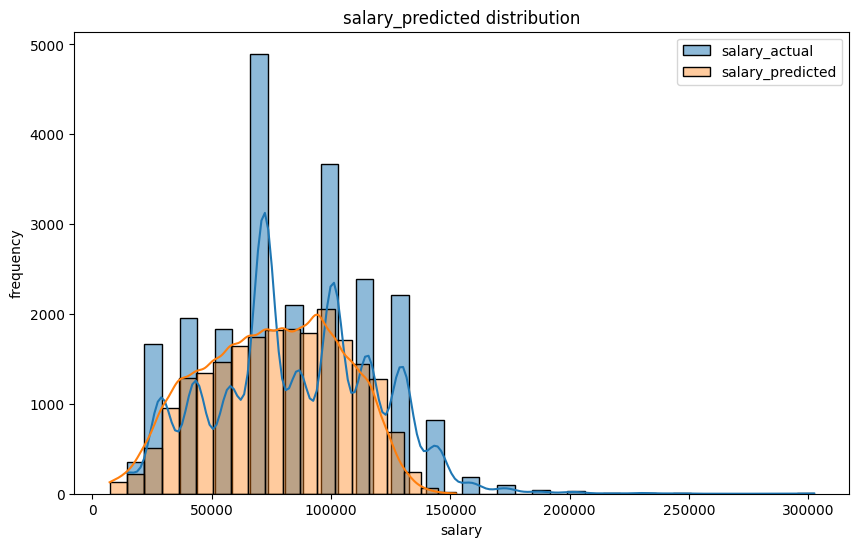

58.csv
я тут
(43534, 11)
1)  [12000.0, 17900.0, 23800.0, 29700.0, 35600.0, 41500.0, 47400.0, 53300.0, 59200.0, 65100.0, 71000.0, 76900.0, 82800.0, 88700.0, 94600.0, 100500.0, 106400.0, 112300.0, 118200.0, 124100.0, 130000.0]
2)  [14923.23093946702, 17380.947533529266, 19838.664127591517, 22296.38072165376, 24754.09731571601, 27211.813909778255, 29669.530503840506, 32127.247097902757, 34584.96369196501, 37042.680286027244, 39500.396880089495, 41958.113474151745, 44415.830068213996, 46873.54666227625, 49331.2632563385, 51788.979850400734, 54246.696444462985, 56704.413038525236, 59162.12963258749, 61619.84622664974, 64077.56282071197]
2.400602255872049


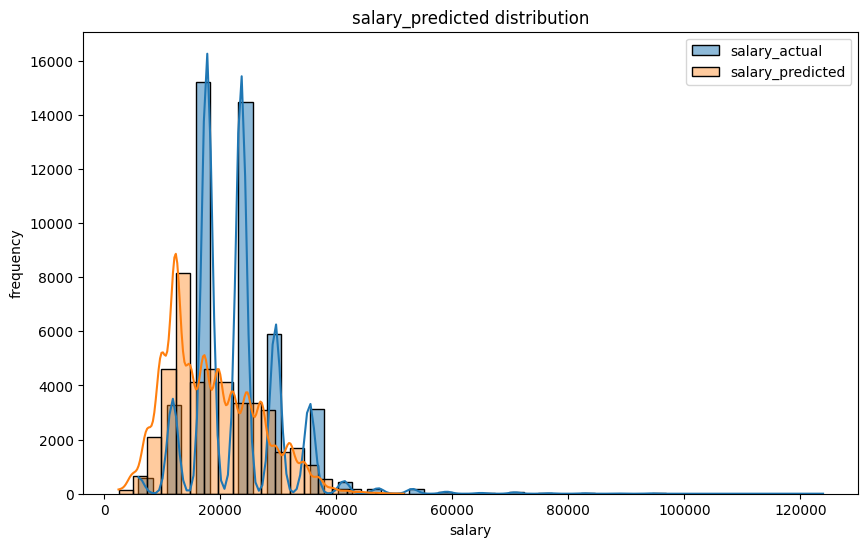

783.csv
я тут
(32736, 11)
1)  [12000.0, 26400.0, 40800.0, 55200.0, 69600.0, 84000.0, 98400.0, 112800.0, 127200.0, 141600.0, 156000.0, 170400.0, 184800.0, 199200.0, 213600.0, 228000.0, 242400.0, 256800.0, 271200.0, 285600.0, 300000.0]
2)  [15405.565614964804, 18474.269295537626, 21542.97297611044, 24611.676656683252, 27680.380337256072, 30749.084017828885, 33817.787698401706, 36886.49137897452, 39955.19505954733, 43023.898740120145, 46092.60242069297, 49161.306101265785, 52230.0097818386, 55298.71346241142, 58367.417142984224, 61436.12082355705, 64504.82450412987, 67573.52818470268, 70642.2318652755, 73710.9355458483, 76779.63922642113]
4.692535187141968


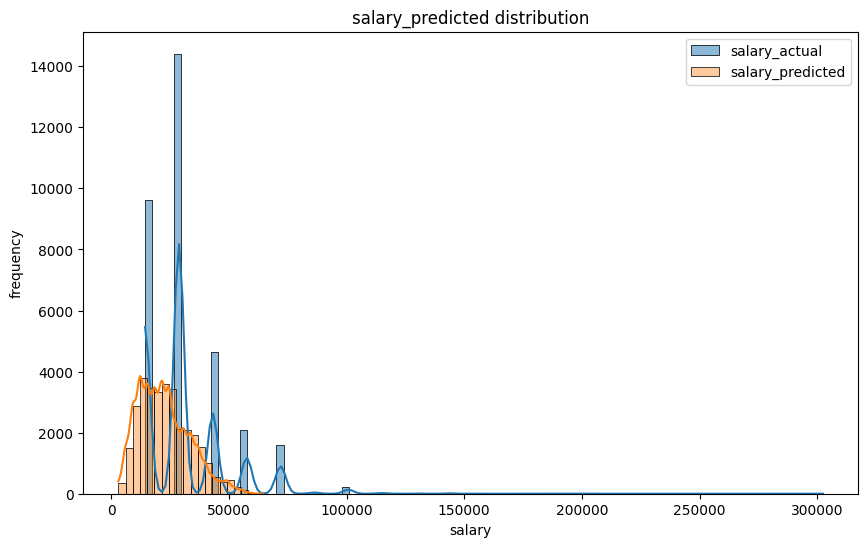

767.csv
я тут
(14578, 11)
1)  [13000.0, 18850.0, 24700.0, 30550.0, 36400.0, 42250.0, 48100.0, 53950.0, 59800.0, 65650.0, 71500.0, 77350.0, 83200.0, 89050.0, 94900.0, 100750.0, 106600.0, 112450.0, 118300.0, 124150.0, 130000.0]
2)  [17386.604681233704, 19558.19725340947, 21729.789825585238, 23901.382397761005, 26072.97496993677, 28244.567542112538, 30416.160114288305, 32587.752686464068, 34759.345258639834, 36930.9378308156, 39102.53040299137, 41274.122975167134, 43445.7155473429, 45617.30811951867, 47788.900691694434, 49960.4932638702, 52132.08583604597, 54303.678408221735, 56475.2709803975, 58646.86355257327, 60818.45612474904]
2.69387548795065


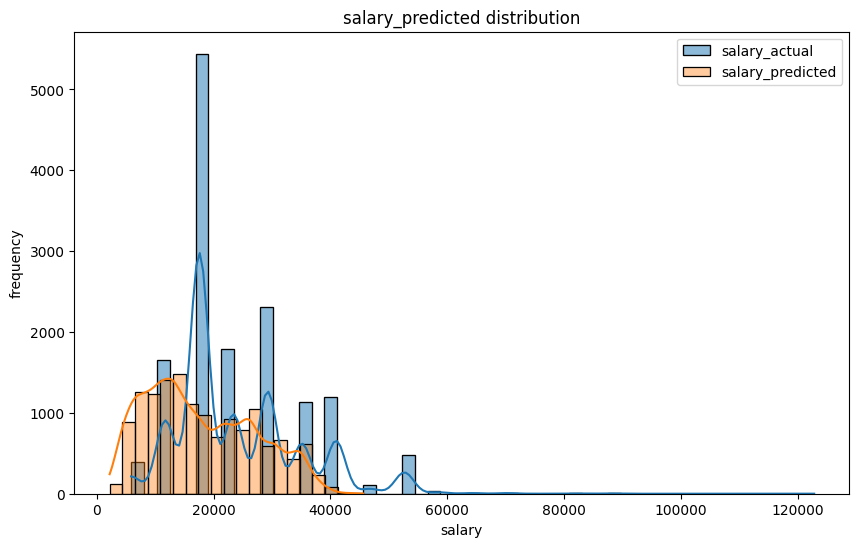

91.csv
я тут
(5625, 11)
1)  [11746.0, 14208.7, 16671.4, 19134.1, 21596.800000000003, 24059.5, 26522.199999999997, 28984.9, 31447.6, 33910.3, 36373.0, 38835.7, 41298.399999999994, 43761.1, 46223.79999999999, 48686.5, 51149.2, 53611.899999999994, 56074.6, 58537.29999999999, 60999.99999999999]


<ipython-input-37-941863b702fe>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2)  [11971.154614977684, 13383.412543489485, 14795.670472001286, 16207.928400513088, 17620.186329024888, 19032.444257536692, 20444.70218604849, 21856.960114560294, 23269.21804307209, 24681.475971583895, 26093.733900095693, 27505.991828607497, 28918.249757119294, 30330.5076856311, 31742.765614142896, 33155.0235426547, 34567.2814711665, 35979.539399678295, 37391.79732819011, 38804.055256701904, 40216.3131852137]
1.74380327437434


<ipython-input-37-941863b702fe>:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



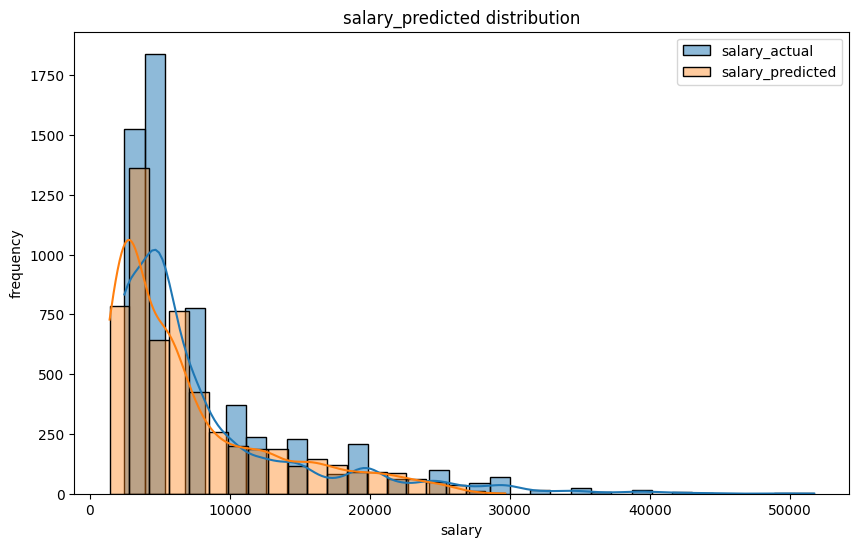

836.csv
я тут
(26132, 11)
1)  [15000.0, 47100.0, 79200.0, 111300.0, 143400.0, 175500.0, 207600.0, 239700.0, 271800.0, 303900.0, 336000.0, 368100.0, 400200.0, 432300.0, 464400.0, 496500.0, 528600.0, 560700.0, 592800.0, 624900.0, 657000.0]
2)  [11818.070849545576, 16289.430106235246, 20760.789362924916, 25232.14861961458, 29703.507876304255, 34174.867132993924, 38646.22638968359, 43117.585646373256, 47588.944903062926, 52060.304159752595, 56531.663416442265, 61003.02267313193, 65474.3819298216, 69945.74118651127, 74417.10044320094, 78888.4596998906, 83359.81895658027, 87831.17821326994, 92302.53746995961, 96773.89672664928, 101245.25598333895]
7.179025025102757


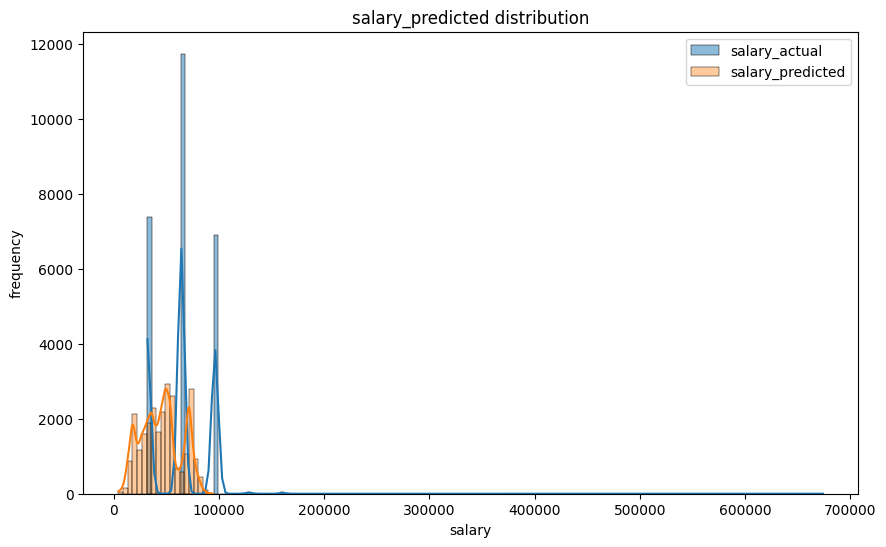

In [ ]:
# task 1
base_dir = '/content/drive/MyDrive/solovey/09.09.23/chart_task2'
for path in paths:
    print(path)
    print('я тут')
    df = pd.read_csv(f'{predicts_path}/{path}')
    print(df.shape)

    # columns_to_draw = ['region_name', 'is_parttime', 'is_vahta', 'experience_id']

    # for col in columns_to_draw:
    #     make_chart(df, column_name=col, save_path=f'{base_dir}/{path[:-4]}/{col}.png')
    # print('я тут')

    charts_bins(df, "predict_before", save_path=f'{base_dir}/{path[:-4]}/predictes_salary.png')
    # charts_bins(df, col, save_path=f'{base_dir}/{path[:-4]}/{col}.png')
    # plot_salaries(df, col, save_path=f'{base_dir}/{path[:-4]}/{col}.png') # без округляения по бинам

    # break



# task 4

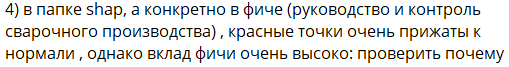

(999_3)

In [3]:
predicts_path = '/content/drive/MyDrive/solovey/09.09.23/predicts_new' # сохраним новые predicts
first_path =  '/content/drive/MyDrive/solovey/09.09.23/super_dfs' # тестовые 1ые 25
first_path = '/content/drive/MyDrive/solovey/Bundles2023'
second_path = '/content/drive/MyDrive/solovey/09.09.23/Bundles0708' # тренировочные 2ые 25 (по индексу join)


In [4]:
for i in [_ for _ in os.listdir(first_path) if 'csv' in _]:
    df = pd.read_csv(f'{first_path}/{i}')
    for j in df.columns:
        if '(999_3)' in j:
            print(i, j)



Bundles_833.csv Руководство и контроль сварочного производства (999_3)


In [5]:
for i in [_ for _ in os.listdir(second_path) if 'Bund' in _]:
    df = pd.read_csv(f'{second_path}/{i}')
    for j in df.columns:
        if '(999_3)' in j:
            print(i, j)




Bundles_898.csv Руководство и контроль сварочного производства (999_3)
Bundles_954.csv Руководство и контроль сварочного производства (999_3)


In [11]:
df = pd.read_csv(f'{second_path}/Bundles_898.csv')
columns = ['Руководство и контроль сварочного производства (999_3)',]
df[columns[0]].value_counts()

1.0    2515
0.0    2192
Name: Руководство и контроль сварочного производства (999_3), dtype: int64

In [ ]:
list(df.columns)

## распределение навыка 999_3 в других бундлах (в которых такой проблемы нет)

In [7]:
def plot_scatter(df, skill):
    fig = px.scatter(df, x='salary_from_rub', color= skill, color_discrete_map={0: 'blue', 1: 'red'},
                    labels={'salary_from_rub': 'Зарплата',  'Знание НТД, НД, ПТД (2712_3)': f'Навык {skill}'})

    fig.update_layout(
        title=f"Распределение зарплаты в зависимости от наличия навыка {skill}",
        xaxis_title="Зарплата",
        yaxis_title="",
    )

    fig.show()
# 954
df = pd.read_csv(f'{second_path}/Bundles_954.csv')
plot_scatter(df, skill='Руководство и контроль сварочного производства (999_3)')

In [37]:
# 833
df = pd.read_csv(f'{first_path}/Bundles_833.csv')
plot_scatter(df, skill='Руководство и контроль сварочного производства (999_3)')
# df['Руководство и контроль сварочного производства (999_3)'].value_counts()

## распределение некоторых других навыков и проблемного (бундл 898)

In [19]:
df = pd.read_csv(f'{second_path}/Bundles_898.csv')
plot_scatter(df, skill='Знание НТД, НД, ПТД (2712_3)')

In [30]:
df = pd.read_csv(f'{second_path}/Bundles_898.csv')
plot_scatter(df, skill='Разрешительная и исполнительная документация (2690_3)')

In [8]:
# вот для этого были проблемы
df = pd.read_csv(f'{second_path}/Bundles_898.csv')
plot_scatter(df, skill='Руководство и контроль сварочного производства (999_3)')
df['Руководство и контроль сварочного производства (999_3)'].value_counts()

1.0    2515
0.0    2192
Name: Руководство и контроль сварочного производства (999_3), dtype: int64

In [39]:
df = pd.read_csv(f'{second_path}/Bundles_898.csv')
df[df['Руководство и контроль сварочного производства (999_3)']==1]['salary_from_rub'].var()

1765503126.8522334

In [43]:
fig = px.scatter(df[df['Руководство и контроль сварочного производства (999_3)']==1], x='salary_from_rub', labels={'salary_from_rub': 'Зарплата'})

fig.update_layout(
    title="График разброса зарплаты",
    xaxis_title="Зарплата",
    yaxis_title="Количество наблюдений",
)

fig.show()